# Project Title : Telco-Customer-Churn Prediction using Machine Learning 
## Quantitative
## A quantitative variable is a variable that reflects a notion of magnitude, that is, if the values it can take are numbers. A quantitative variable represents thus a measure and is numerical.

## Quantitative variables are divided into two types: discrete and continuous. The difference is explained in the following two sections.

## Discrete
## Quantitative discrete variables are variables for which the values it can take are countable and have a finite number of possibilities. The values are often (but not always) integers. Here are some examples of discrete variables:

## Continuous
## On the other hand, quantitative continuous variables are variables for which the values are not countable and have an infinite number of possibilities. For example: Age,Weight,Height  

## Qualitative
## In opposition to quantitative variables, qualitative variables (also referred as categorical variables or factors in R) are variables that are not numerical and which values fits into categories.

## In other words, a qualitative variable is a variable which takes as its values modalities, categories or even levels, in contrast to quantitative variables which measure a quantity on each individual.

## Qualitative variables are divided into two types: nominal and ordinal.
## Nominal
## A qualitative nominal variable is a qualitative variable where no ordering is possible or implied in the levels.

## For example, the variable gender is nominal because there is no order in the levels (no matter how many levels you consider for the gender—only two with female/male, or more than two with female/male/ungendered/others, levels are unordered). Eye color is another example of a nominal variable because there is no order among blue, brown or green eyes.

## Ordinal
## On the other hand, a qualitative ordinal variable is a qualitative variable with an order implied in the levels. For instance, if the severity of road accidents has been measured on a scale such as light, moderate and fatal accidents, this variable is a qualitative ordinal variable because there is a clear order in the levels.

## Another good example is health, which can take values such as poor, reasonable, good, or excellent. Again, there is a clear order in these levels so health is in this case a qualitative ordinal variable

## Nominal : 
1. gender
2. customerID
3. Partner
4. Dependents
5. PhoneService
6. MultipleLines
7. InternetService
8. OnlineSecurity
9. DeviceProtection
10. TechSupport
11. StreamingTV
12. StreamingMovies
13. PaperlessBilling
14. TotalCharges
## Ordinal :
15. Contract


## DISCRETE: 
16. SeniorCitizen

## Continuoue
17. MonthlyCharges
18. TotalCharges

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [12]:
import xgboost as xgb

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
import seaborn as sns

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
import pickle

In [18]:
from sklearn import svm

In [19]:
import pandas as pd

In [20]:
df=pd.read_csv('Telco-Customer-Churn.csv')


In [21]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [22]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<AxesSubplot:xlabel='gender', ylabel='count'>

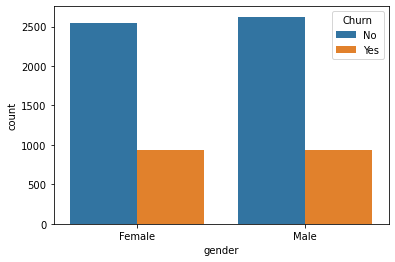

In [25]:
sns.countplot(x='gender',data=df,hue='Churn')

In [26]:
label_df=df.groupby(["gender","Churn"]).size().sort_values().index

In [27]:
val_df=df.groupby(["gender","Churn"]).size().sort_values().values

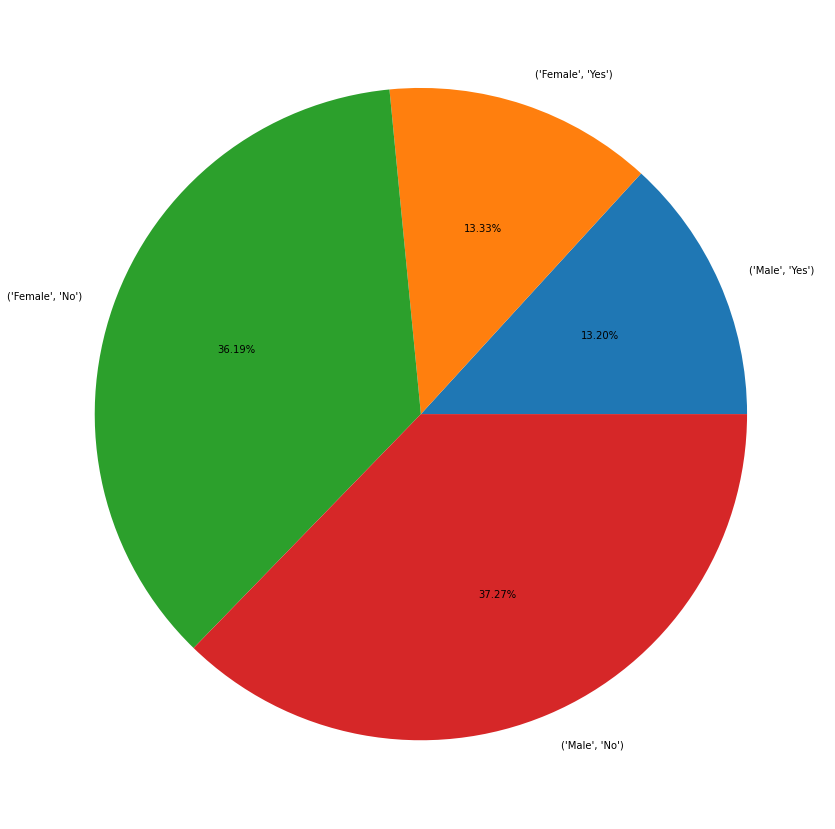

In [28]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Male customers do less churn as compare to Female customers 
2. Female customers do more churn as comapred to Female customers

In [29]:
df.groupby(["gender","Churn"]).size()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='count'>

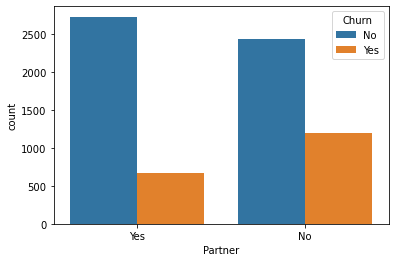

In [30]:
sns.countplot(x='Partner',hue='Churn',data=df)

In [31]:
label_df=df.groupby(["Partner","Churn"]).size().sort_values().index

In [32]:
val_df=df.groupby(["Partner","Churn"]).size().sort_values().values

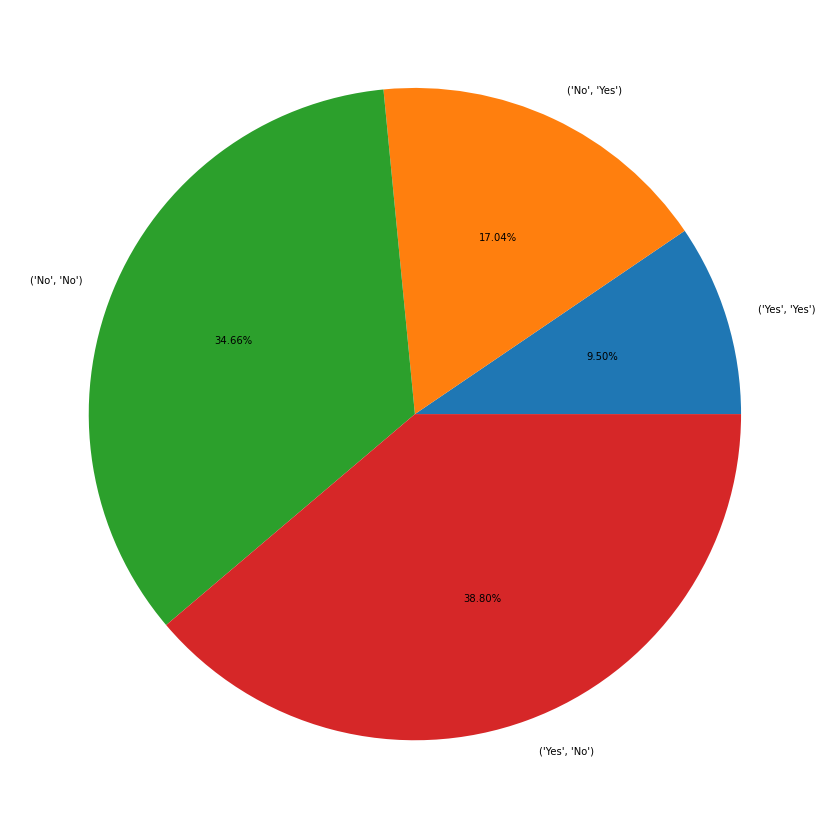

In [33]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having partner do minimum churn.
2. Customers having no partner do maximum churn.

In [34]:
df.groupby("Partner")['Churn'].value_counts()

Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

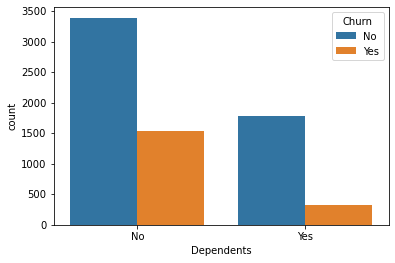

In [35]:
sns.countplot(x=df['Dependents'],hue=df['Churn'])

In [36]:
df.groupby(["Dependents","Churn"]).size()

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
dtype: int64

In [37]:
label_df=df.groupby(["Dependents","Churn"]).size().sort_values().index

In [38]:
val_df=df.groupby(["Dependents","Churn"]).size().sort_values().values

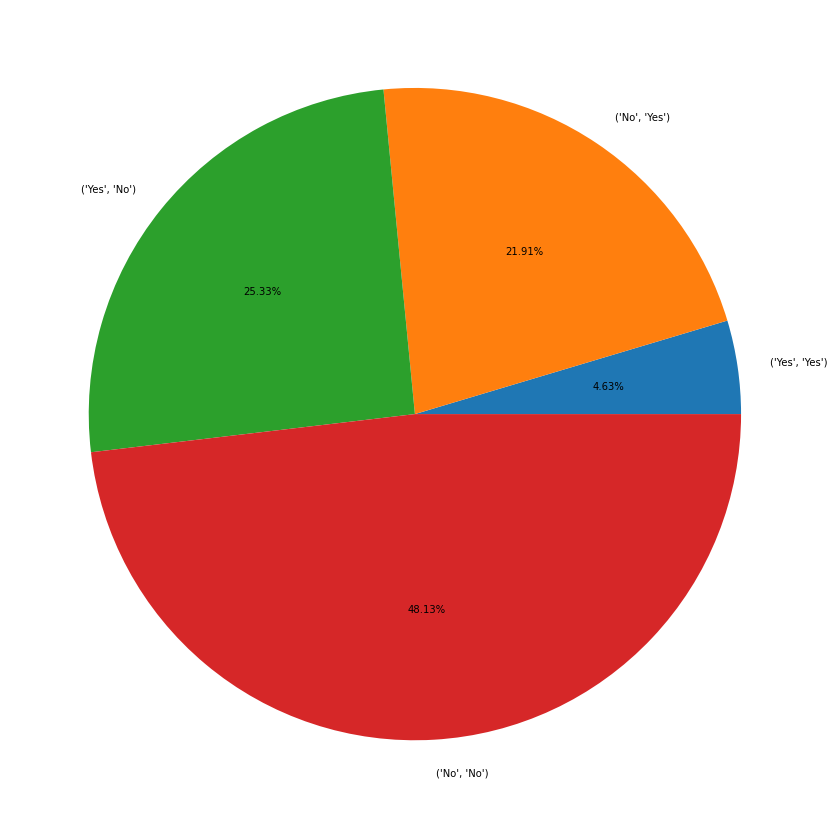

In [39]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who don't have dependents do minimum and maximum churn.

<AxesSubplot:xlabel='tenure', ylabel='count'>

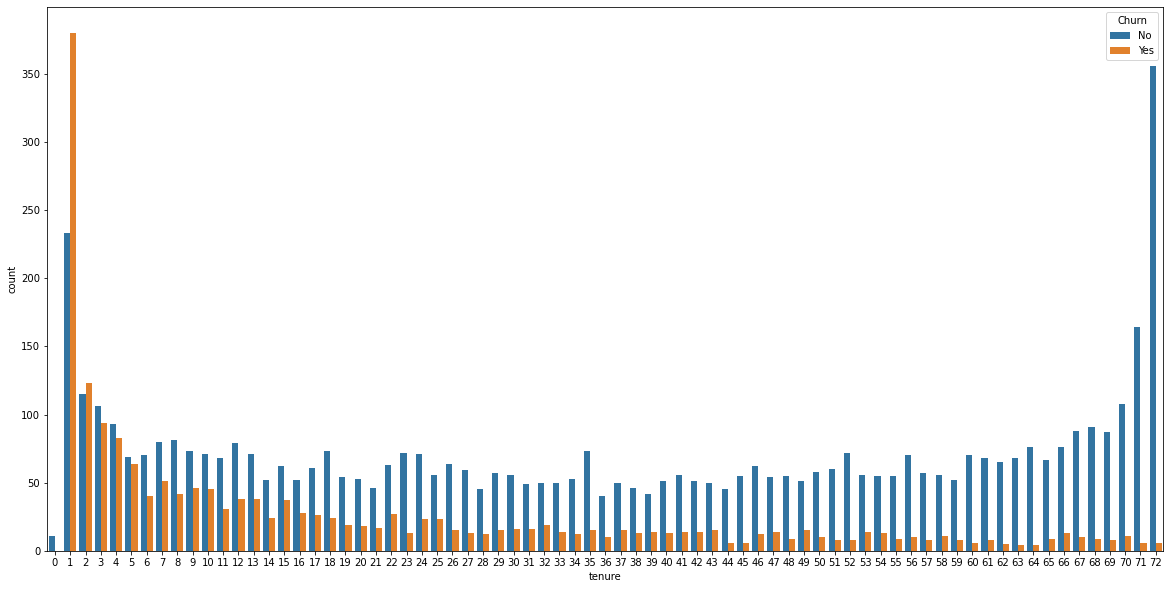

In [40]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['tenure'],hue=df['Churn'])


In [41]:
df.groupby("tenure")['Churn'].value_counts()

tenure  Churn
0       No        11
1       Yes      380
        No       233
2       Yes      123
        No       115
                ... 
70      Yes       11
71      No       164
        Yes        6
72      No       356
        Yes        6
Name: Churn, Length: 145, dtype: int64

In [42]:
label_df=df.groupby(["tenure","Churn"]).size().sort_values(ascending=False).index

In [43]:
val_df=df.groupby(["tenure","Churn"]).size().sort_values(ascending=False).values

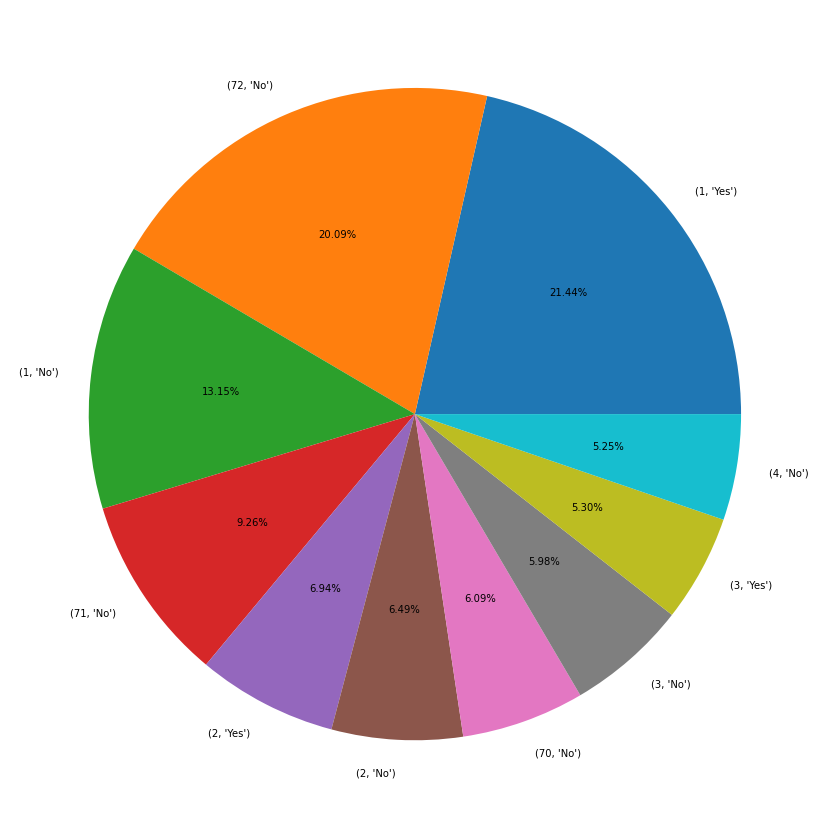

In [44]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who have tenure of 1 months do maximum churn
2. Customers who have tenure of 72 months do minimum churn

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

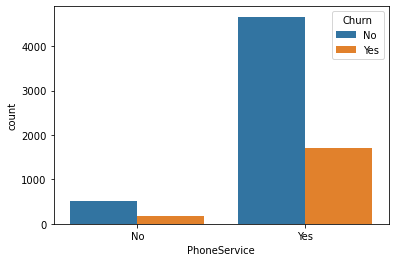

In [45]:
sns.countplot(x='PhoneService',hue='Churn',data=df)

In [46]:
df.groupby("PhoneService")['Churn'].value_counts()

PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
Name: Churn, dtype: int64

In [47]:
label_df=df.groupby(["PhoneService","Churn"]).size().sort_values(ascending=False).index

In [48]:
val_df=df.groupby(["PhoneService","Churn"]).size().sort_values(ascending=False).values

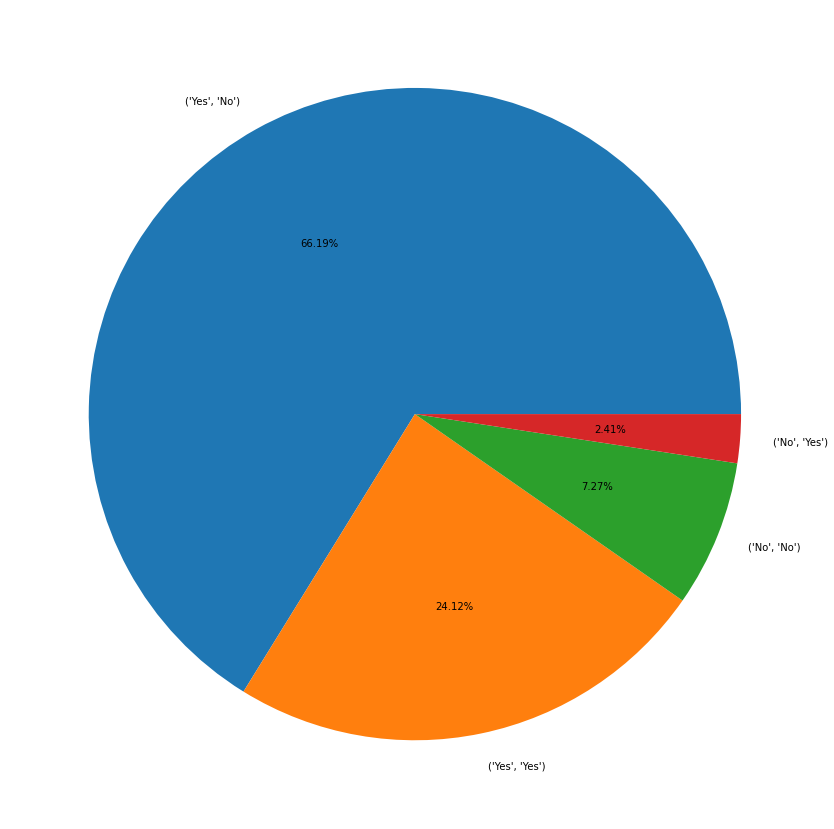

In [49]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who have PhoneService do minimum churn.
2. Customers who have PhoneService do maximum churn.


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

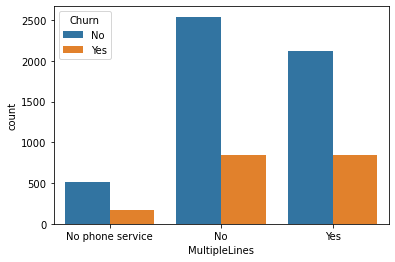

In [50]:
sns.countplot(x='MultipleLines',hue='Churn',data=df)

In [51]:
df.groupby("MultipleLines")['Churn'].value_counts()

MultipleLines     Churn
No                No       2541
                  Yes       849
No phone service  No        512
                  Yes       170
Yes               No       2121
                  Yes       850
Name: Churn, dtype: int64

In [52]:
label_df=df.groupby(["MultipleLines","Churn"]).size().sort_values(ascending=False).index

In [53]:
val_df=df.groupby(["MultipleLines","Churn"]).size().sort_values(ascending=False).values

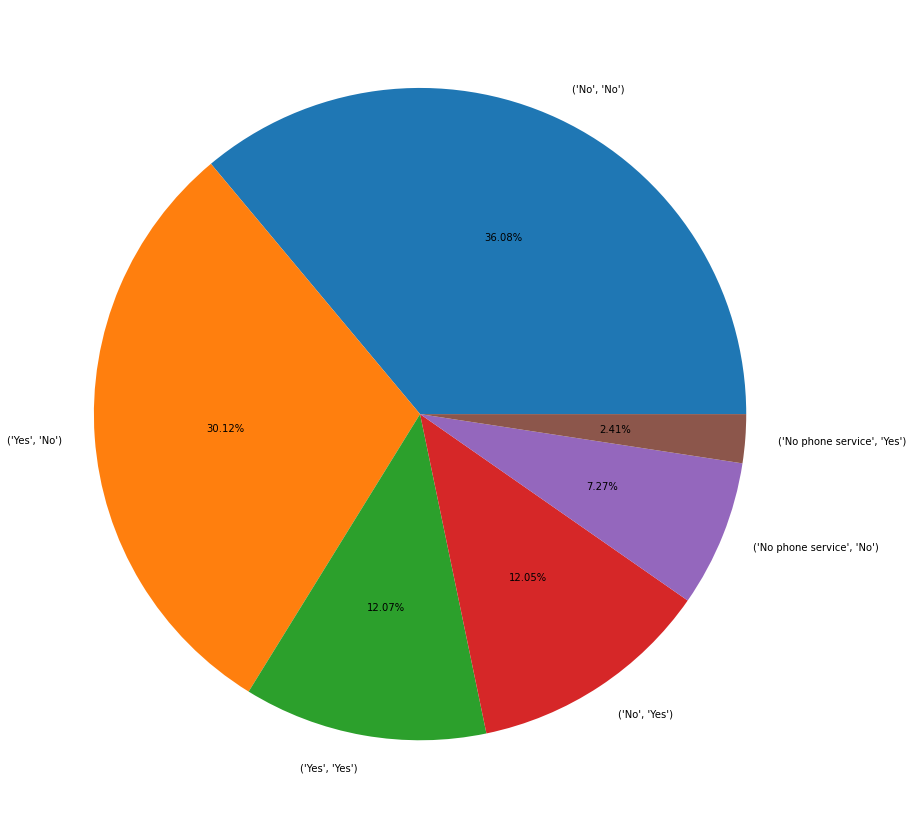

In [54]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who don't have MultipleLines Service do minimum churn
2. Customers who  have MultipleLines Service do maximum churn


<AxesSubplot:xlabel='InternetService', ylabel='count'>

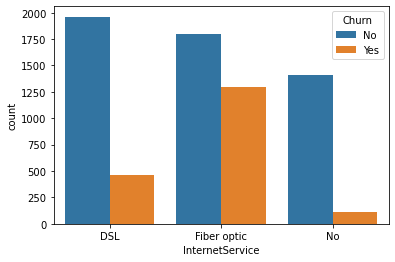

In [55]:
sns.countplot(x='InternetService',hue='Churn',data=df)

In [56]:
df.groupby("InternetService")['Churn'].value_counts()

InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: Churn, dtype: int64

In [57]:
label_df=df.groupby(["InternetService","Churn"]).size().sort_values(ascending=False).index

In [58]:
val_df=df.groupby(["InternetService","Churn"]).size().sort_values(ascending=False).values

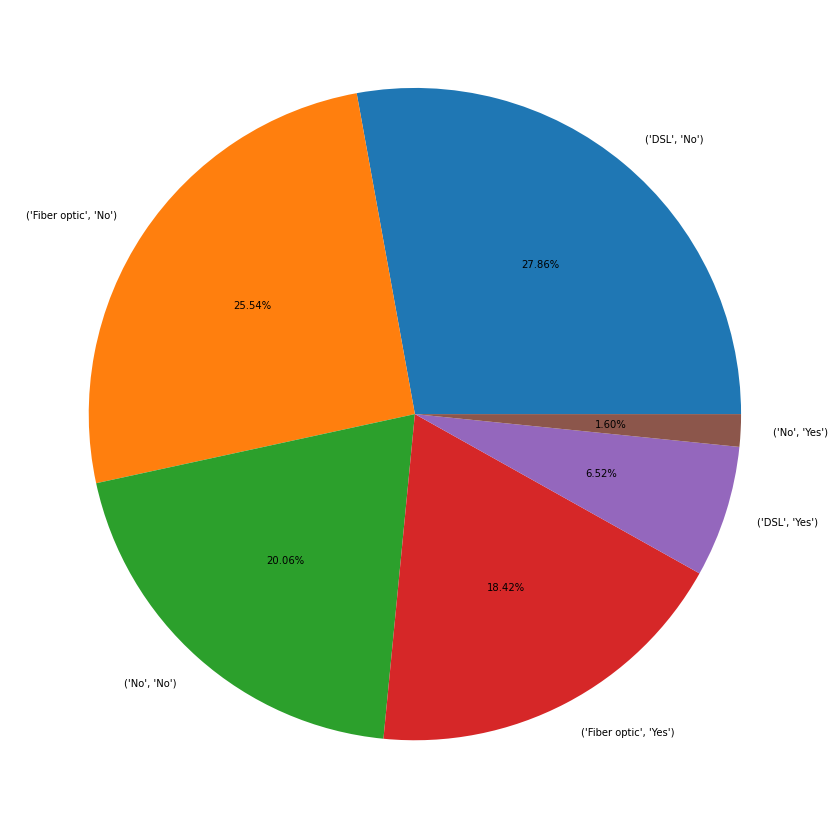

In [59]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having DSL internet service do minimum churn
2. Customer having Fiber Optic service do maximum churn

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

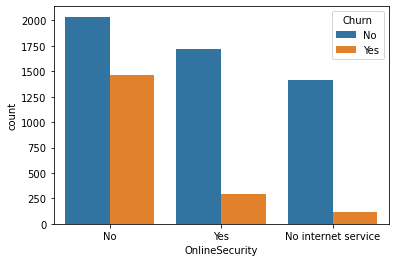

In [60]:
sns.countplot(x='OnlineSecurity',hue='Churn',data=df)

In [61]:
df.groupby("OnlineSecurity")['Churn'].value_counts()

OnlineSecurity       Churn
No                   No       2037
                     Yes      1461
No internet service  No       1413
                     Yes       113
Yes                  No       1724
                     Yes       295
Name: Churn, dtype: int64

In [62]:
label_df=df.groupby(["OnlineSecurity","Churn"]).size().sort_values(ascending=False).index

In [63]:
val_df=df.groupby(["OnlineSecurity","Churn"]).size().sort_values(ascending=False).values

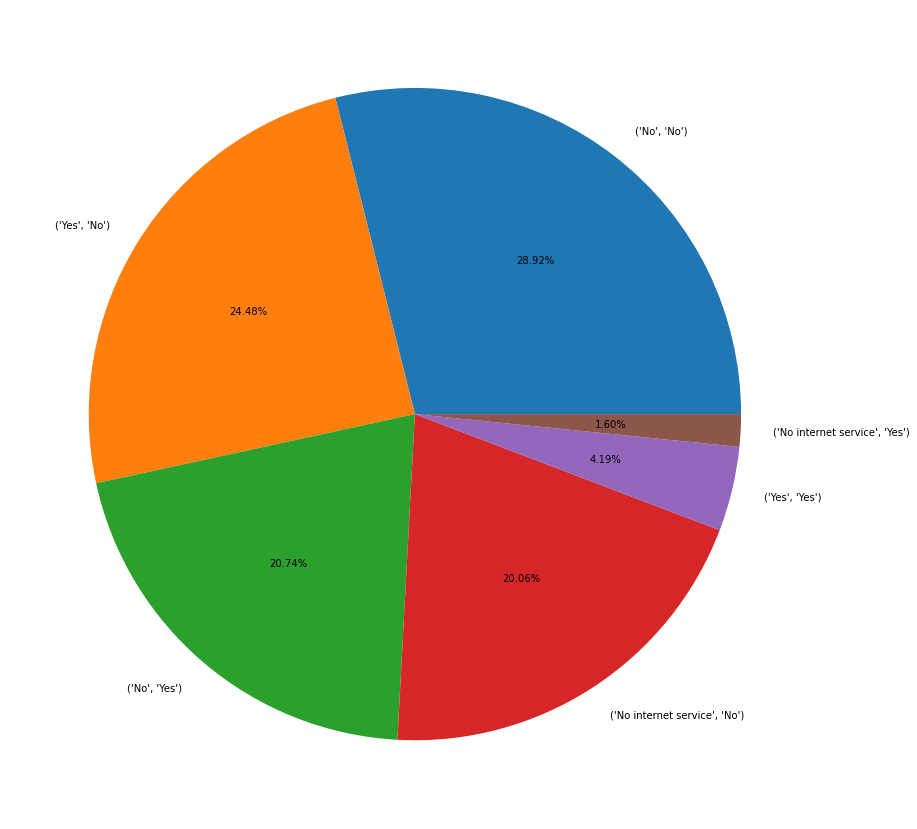

In [64]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having no OnlineSecurity do minimum churn
2. Customers having no OnlineSecurity do maximum churn

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

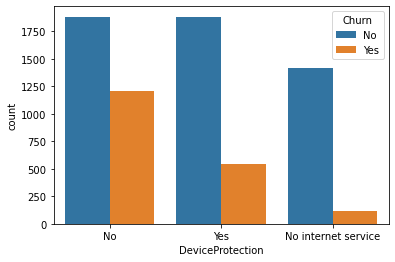

In [65]:
sns.countplot(x='DeviceProtection',hue='Churn',data=df)

In [66]:
df.groupby("DeviceProtection")['Churn'].value_counts()

DeviceProtection     Churn
No                   No       1884
                     Yes      1211
No internet service  No       1413
                     Yes       113
Yes                  No       1877
                     Yes       545
Name: Churn, dtype: int64

In [67]:
label_df=df.groupby(["DeviceProtection","Churn"]).size().sort_values(ascending=False).index

In [68]:
val_df=df.groupby(["DeviceProtection","Churn"]).size().sort_values(ascending=False).values

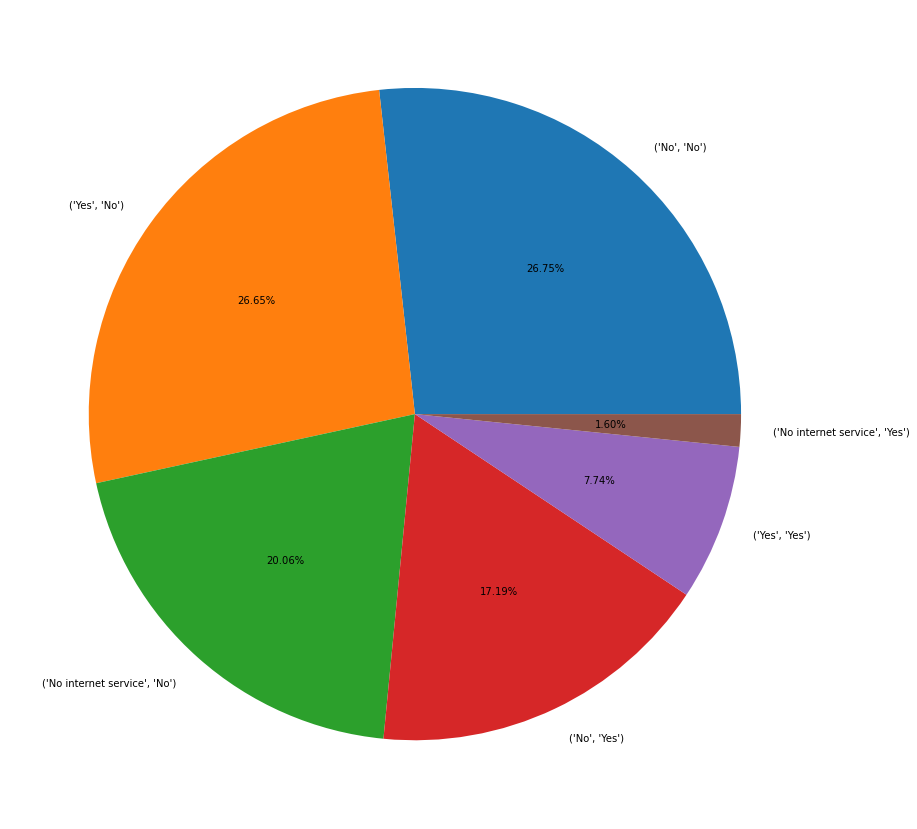

In [69]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having no DeviceProtection do minimum churn
2. Customers having no DeviceProtection do maximum churn

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

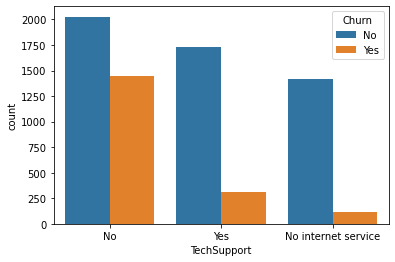

In [70]:
sns.countplot(x='TechSupport',hue='Churn',data=df)

In [71]:
df.groupby("TechSupport")['Churn'].value_counts()

TechSupport          Churn
No                   No       2027
                     Yes      1446
No internet service  No       1413
                     Yes       113
Yes                  No       1734
                     Yes       310
Name: Churn, dtype: int64

In [72]:
label_df=df.groupby(["TechSupport","Churn"]).size().sort_values(ascending=False).index

In [73]:
val_df=df.groupby(["TechSupport","Churn"]).size().sort_values(ascending=False).values

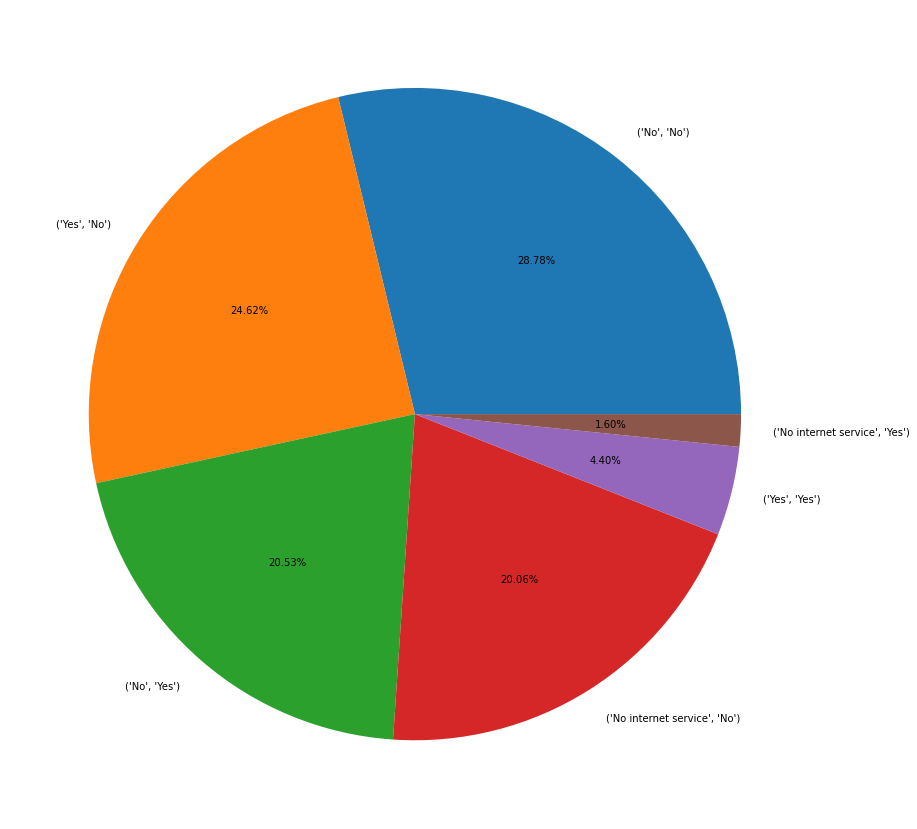

In [74]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having no TechSupport do minimum churn
2. Customers having no TechSupport do maximum churn

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

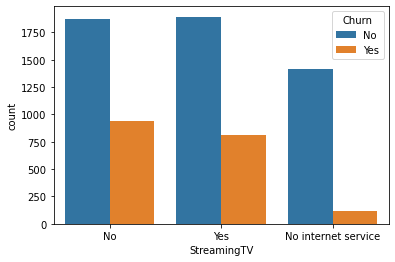

In [75]:
sns.countplot(x=df['StreamingTV'],hue=df['Churn'])

In [76]:
df.groupby("StreamingTV")['Churn'].value_counts()

StreamingTV          Churn
No                   No       1868
                     Yes       942
No internet service  No       1413
                     Yes       113
Yes                  No       1893
                     Yes       814
Name: Churn, dtype: int64

In [77]:
label_df=df.groupby(["StreamingTV","Churn"]).size().sort_values(ascending=False).index

In [78]:
val_df=df.groupby(["StreamingTV","Churn"]).size().sort_values(ascending=False).values

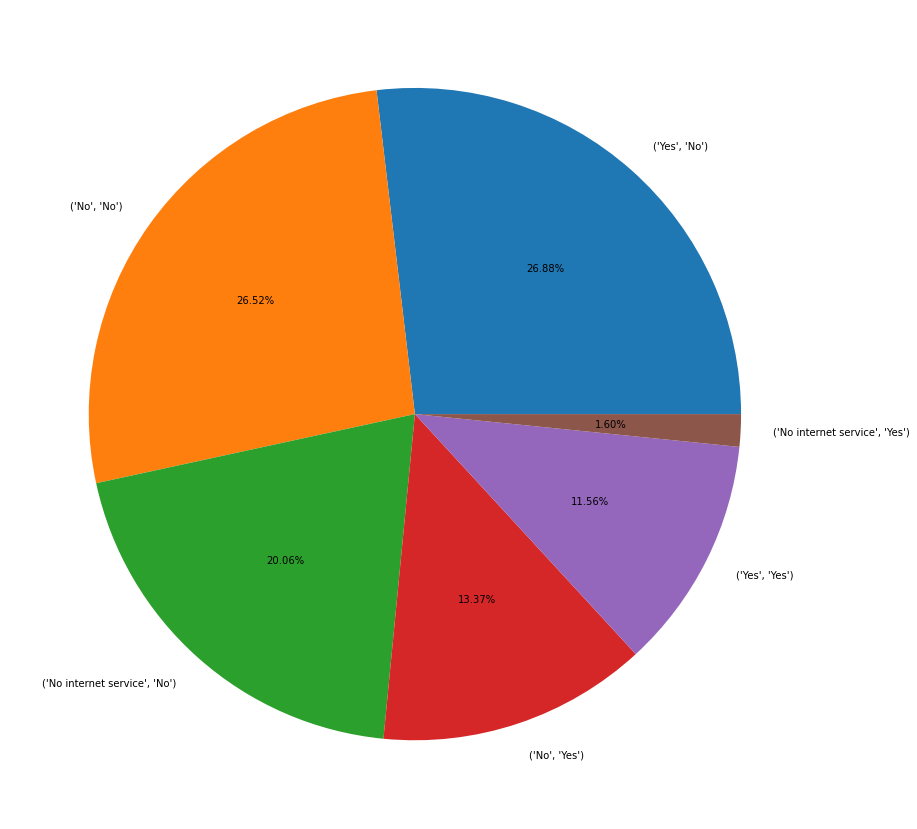

In [79]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having  StreamingTV do minimum churn
2. Customers having no StreamingTV do maximum churn

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

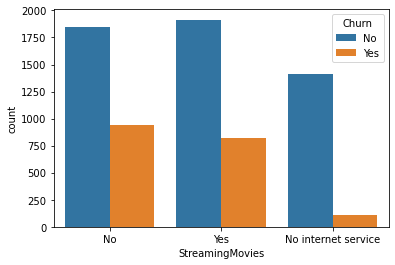

In [80]:
sns.countplot(x=df['StreamingMovies'],hue=df['Churn'])

In [81]:
df.groupby("StreamingMovies")['Churn'].value_counts()

StreamingMovies      Churn
No                   No       1847
                     Yes       938
No internet service  No       1413
                     Yes       113
Yes                  No       1914
                     Yes       818
Name: Churn, dtype: int64

In [82]:
label_df=df.groupby(["StreamingMovies","Churn"]).size().sort_values(ascending=False).index

In [83]:
val_df=df.groupby(["StreamingMovies","Churn"]).size().sort_values(ascending=False).values

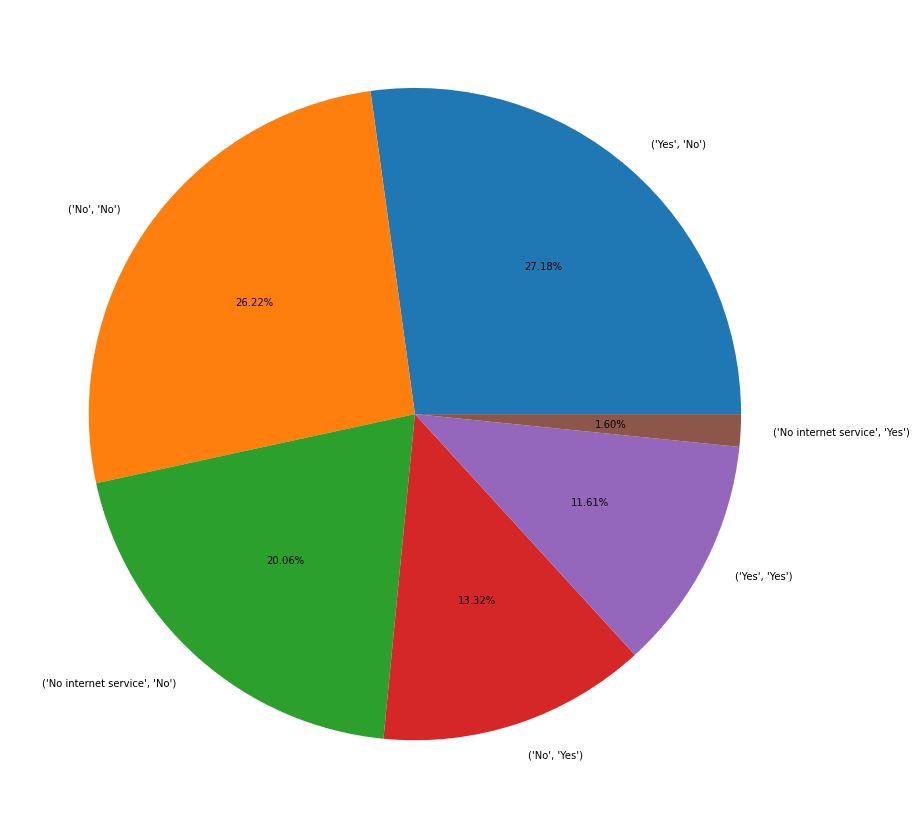

In [84]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having  StreamingMovies do minimum churn
2. Customers having no StreamingMovies do maximum churn

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contract', ylabel='count'>

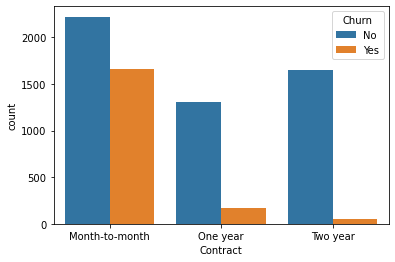

In [85]:
sns.countplot(df['Contract'],hue=df['Churn'])

In [86]:
df.groupby("Contract")['Churn'].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: Churn, dtype: int64

In [87]:
label_df=df.groupby(["Contract","Churn"]).size().sort_values(ascending=False).index

In [88]:
val_df=df.groupby(["Contract","Churn"]).size().sort_values(ascending=False).values

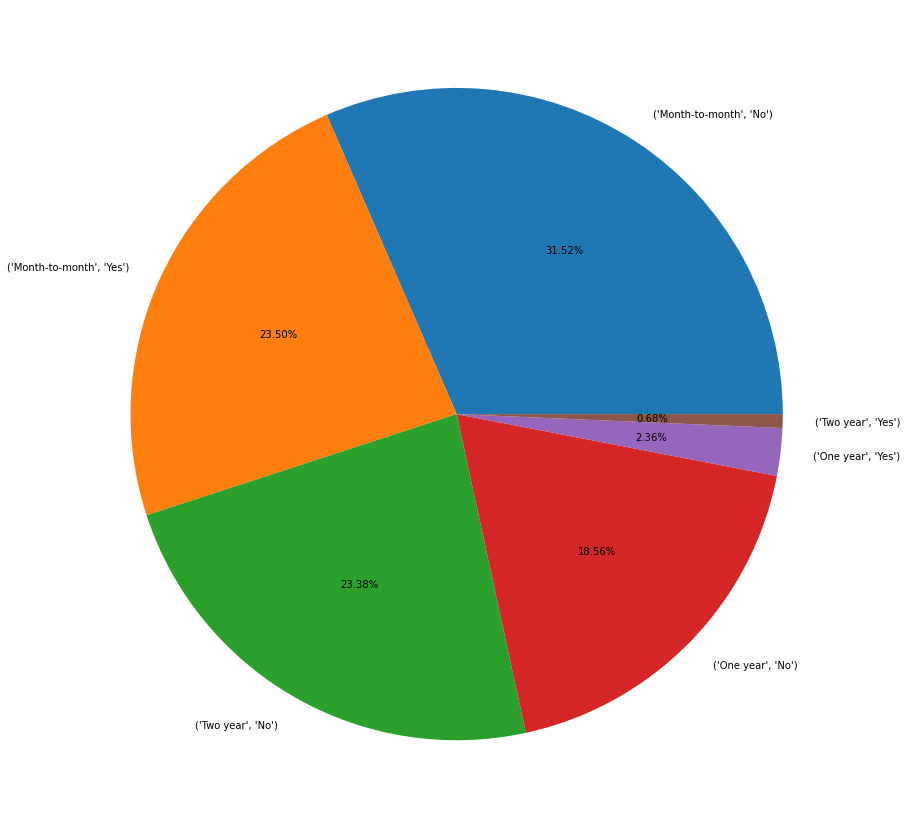

In [89]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having  Contract month-to-month do minimum churn
2. Customers having  Contract month-to-month do maximum churn

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

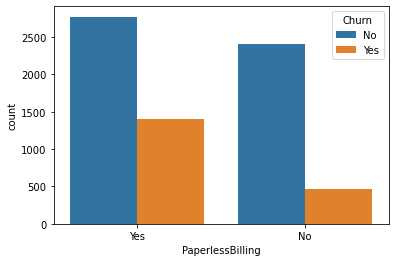

In [90]:
sns.countplot(df['PaperlessBilling'],hue=df['Churn'])

In [91]:
df.groupby("PaperlessBilling")['Churn'].value_counts()

PaperlessBilling  Churn
No                No       2403
                  Yes       469
Yes               No       2771
                  Yes      1400
Name: Churn, dtype: int64

# Observations:
1. Customers having PaperlessBilling do minimum churn
2. Customers having PaperlessBilling do maximum churn

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

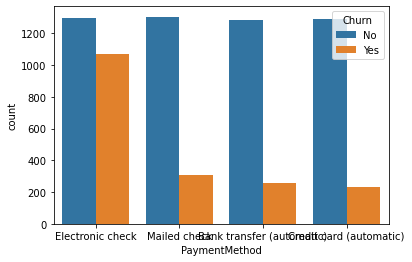

In [92]:
sns.countplot(df['PaymentMethod'],hue=df['Churn'])

In [93]:
label_df=df.groupby(["PaymentMethod","Churn"]).size().sort_values(ascending=False).index

In [94]:
val_df=df.groupby(["PaymentMethod","Churn"]).size().sort_values(ascending=False).values

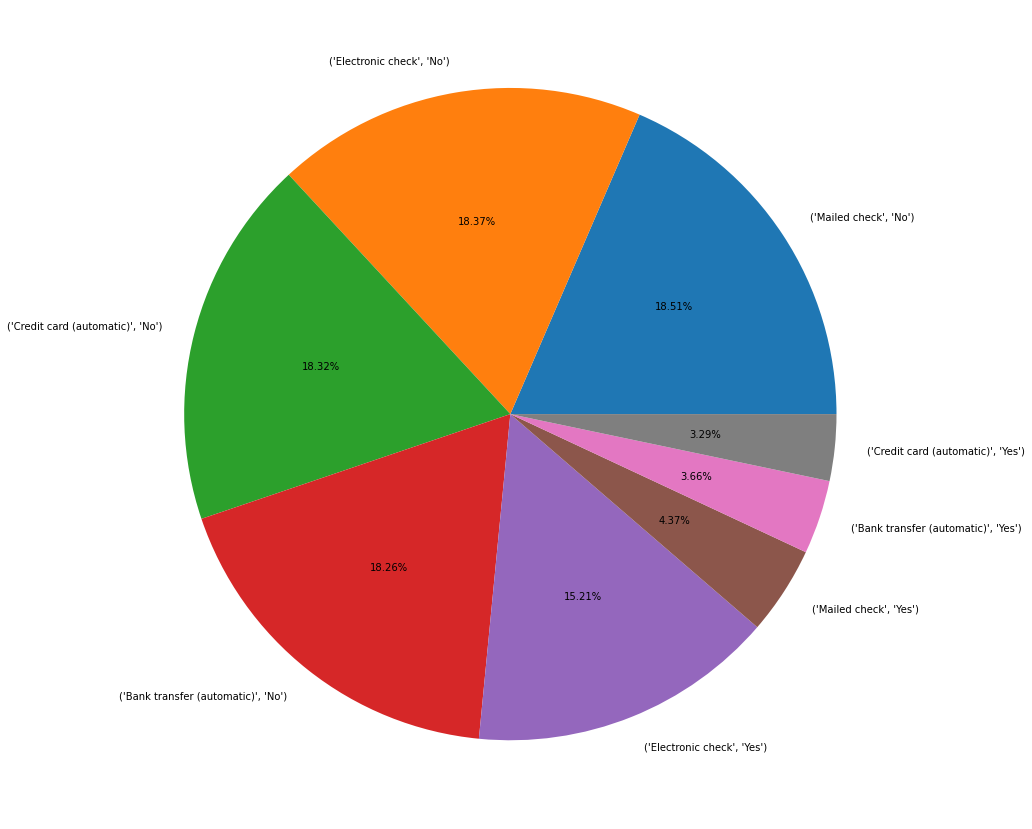

In [95]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [96]:
df.groupby("PaymentMethod")['Churn'].value_counts()

PaymentMethod              Churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1304
                           Yes       308
Name: Churn, dtype: int64

# Observations:
1. Customers having mailed check do minimum churn
2. Customers having Electronic check do maximum churn

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

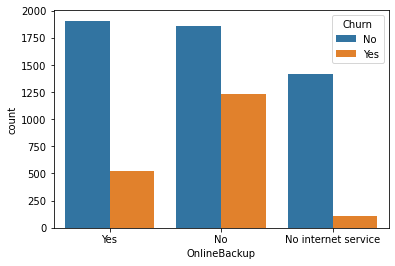

In [97]:
sns.countplot(x=df['OnlineBackup'],hue=df['Churn'])

In [98]:
df.groupby("OnlineBackup")['Churn'].value_counts()

OnlineBackup         Churn
No                   No       1855
                     Yes      1233
No internet service  No       1413
                     Yes       113
Yes                  No       1906
                     Yes       523
Name: Churn, dtype: int64

In [99]:
label_df=df.groupby(["OnlineBackup","Churn"]).size().sort_values(ascending=False).index

In [100]:
val_df=df.groupby(["OnlineBackup","Churn"]).size().sort_values(ascending=False).values

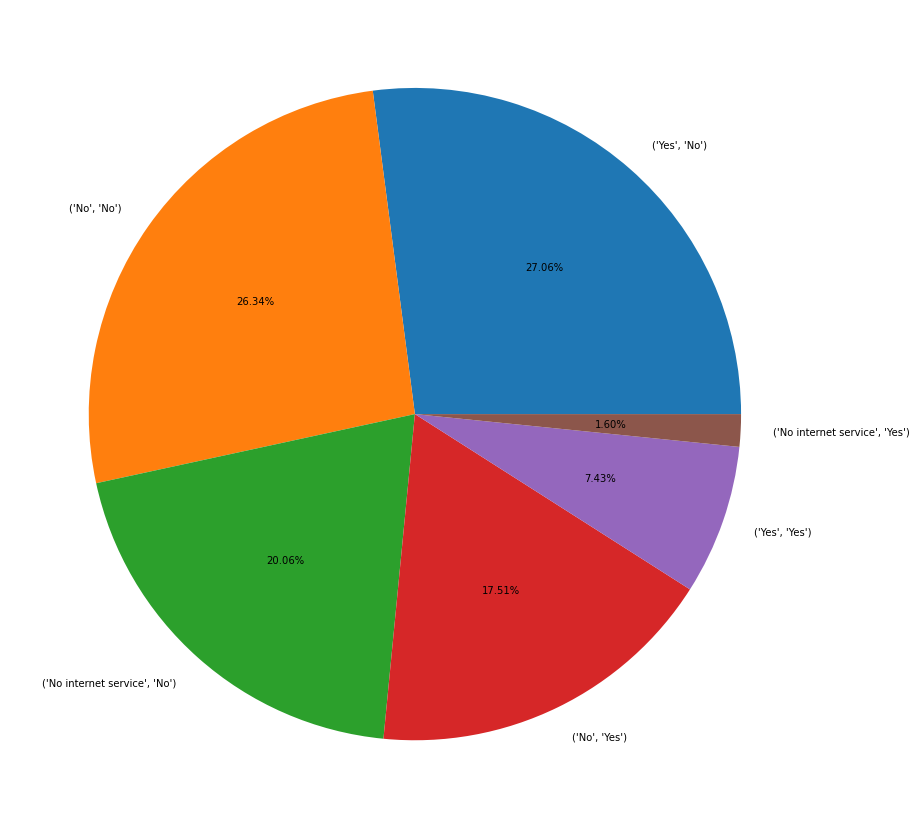

In [101]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having OnlineBackup do minimum churn
2. Customers having no OnlineBackup do maximum churn

<AxesSubplot:xlabel='gender', ylabel='MonthlyCharges'>

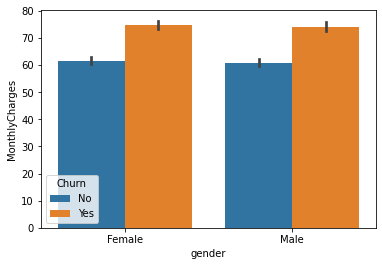

In [102]:
sns.barplot(x='gender',y='MonthlyCharges',data=df,hue='Churn')

In [103]:
df.groupby(["gender","Churn"])['MonthlyCharges'].mean()

gender  Churn
Female  No       61.664908
        Yes      74.812087
Male    No       60.876914
        Yes      74.066989
Name: MonthlyCharges, dtype: float64

In [104]:
label_df=df.groupby(["gender","Churn"])['MonthlyCharges'].mean().sort_values(ascending=False).index

In [105]:
val_df=df.groupby(["gender","Churn"])['MonthlyCharges'].mean().sort_values(ascending=False).values

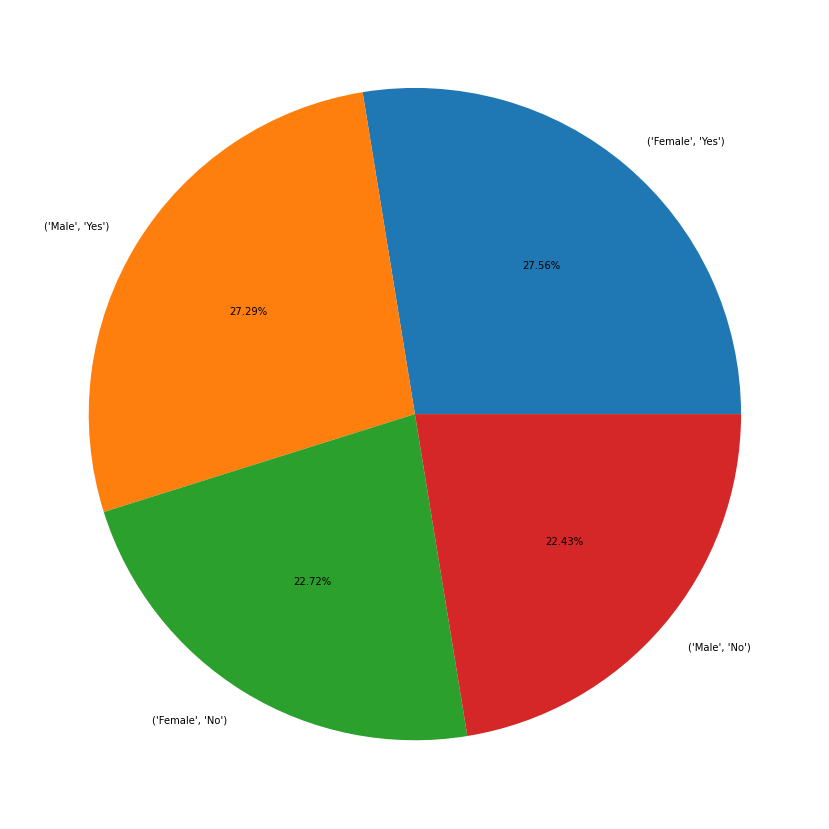

In [106]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Female Customers do maximum churn
2. Female Customers do minimum churn


<AxesSubplot:xlabel='gender', ylabel='MonthlyCharges'>

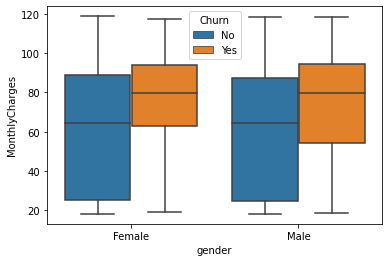

In [107]:
sns.boxplot(x=df['gender'],y=df['MonthlyCharges'],hue=df['Churn'])

In [108]:
label_df=df.groupby(["gender","Churn"])['MonthlyCharges'].mean().sort_values().index

In [109]:
val_df=df.groupby(["gender","Churn"])['MonthlyCharges'].mean().sort_values().values

# Observations:
1. Female Customers do maximum churn
2. Female Customers do minimum churn


<AxesSubplot:xlabel='InternetService', ylabel='MonthlyCharges'>

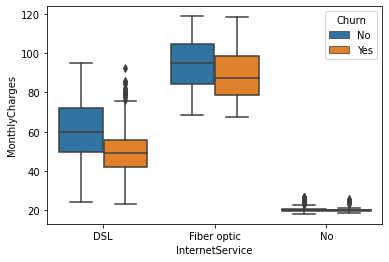

In [110]:
sns.boxplot(x=df['InternetService'],y=df['MonthlyCharges'],hue=df['Churn'])

In [111]:
df.groupby(["InternetService","Churn"])['MonthlyCharges'].mean()

InternetService  Churn
DSL              No       60.212105
                 Yes      49.083224
Fiber optic      No       93.932379
                 Yes      88.126484
No               No       21.136058
                 Yes      20.368142
Name: MonthlyCharges, dtype: float64

In [112]:
label_df=df.groupby(["InternetService","Churn"])['MonthlyCharges'].mean().sort_values(ascending=False).index

In [113]:
val_df=df.groupby(["InternetService","Churn"])['MonthlyCharges'].mean().sort_values(ascending=False).values

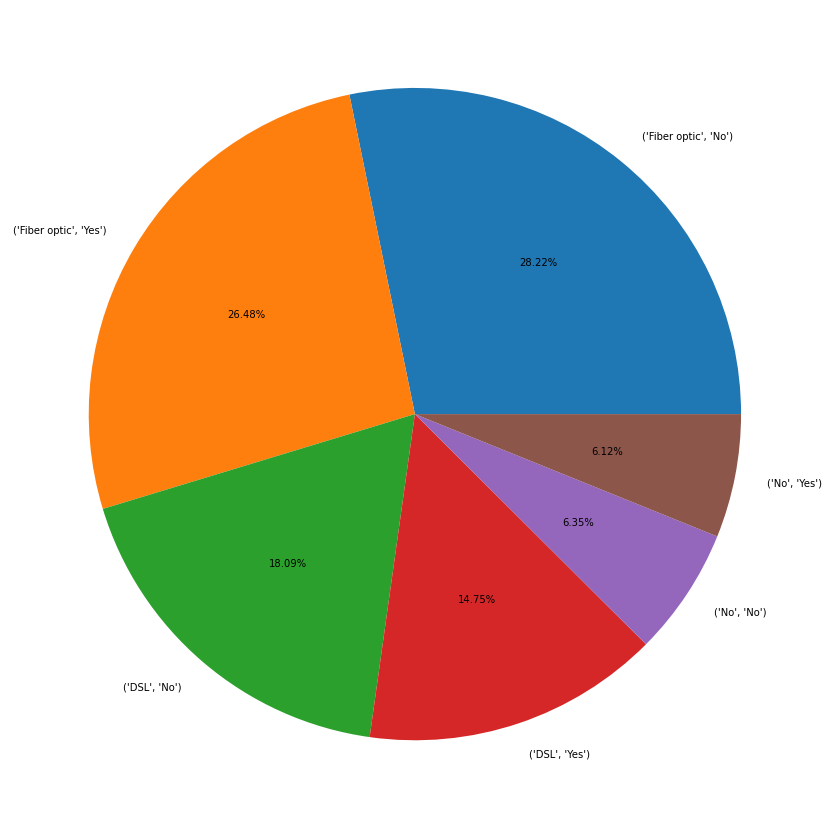

In [114]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Avg Monthly charges for Fiber optic is more as compared to DSL
2. Avg Monthly charges for churn customers are low as compared to non-churn customers for DSL
3. Avg Monthly charges for churn customers are low as compared to non-churn customers for Fiber optic


<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

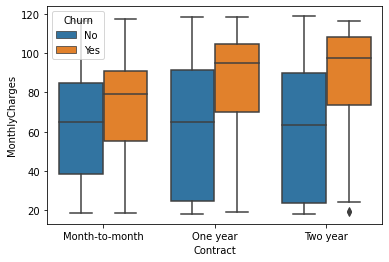

In [115]:
sns.boxplot(x=df['Contract'],y=df['MonthlyCharges'],hue=df['Churn'])

In [116]:
df.groupby(["Contract","Churn"])['MonthlyCharges'].mean()

Contract        Churn
Month-to-month  No       61.462635
                Yes      73.019396
One year        No       62.508148
                Yes      85.050904
Two year        No       60.012477
                Yes      86.777083
Name: MonthlyCharges, dtype: float64

In [117]:
label_df=df.groupby(["Contract","Churn"])['MonthlyCharges'].mean().sort_values(ascending=False).index

In [118]:
val_df=df.groupby(["Contract","Churn"])['MonthlyCharges'].mean().sort_values(ascending=False).values

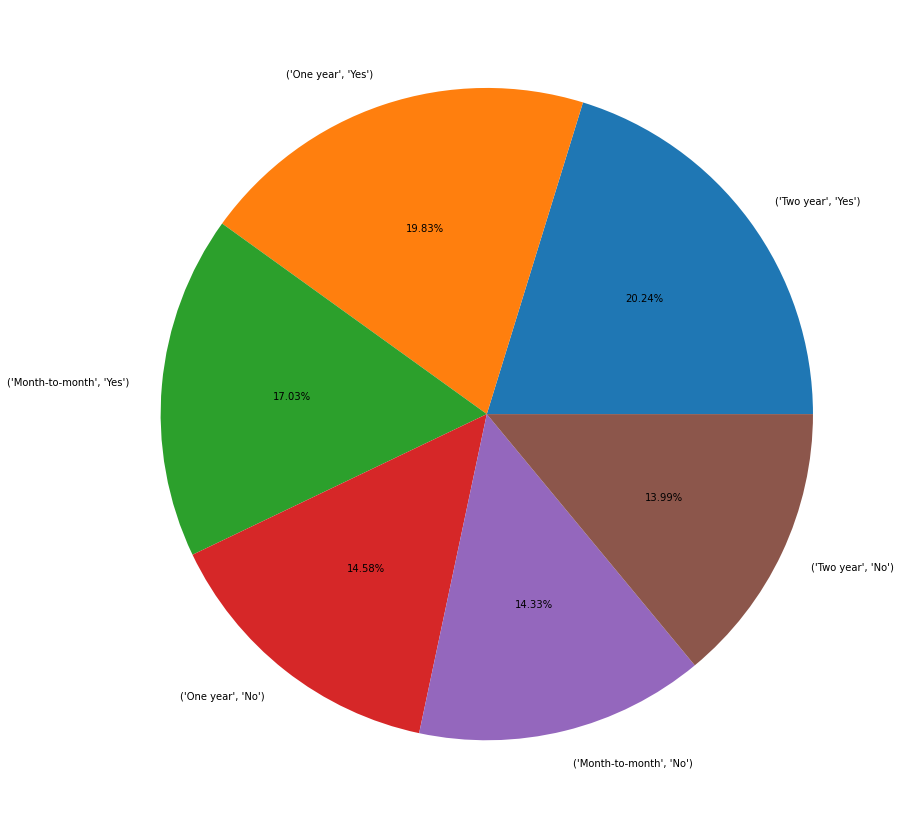

In [119]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Avg Monthly charges for two year contract who churn is maximum : 86.777083
2. Avg Monthly charges for month-to-month contract who do not churn is minimum : 61.462635



<AxesSubplot:xlabel='PaymentMethod', ylabel='MonthlyCharges'>

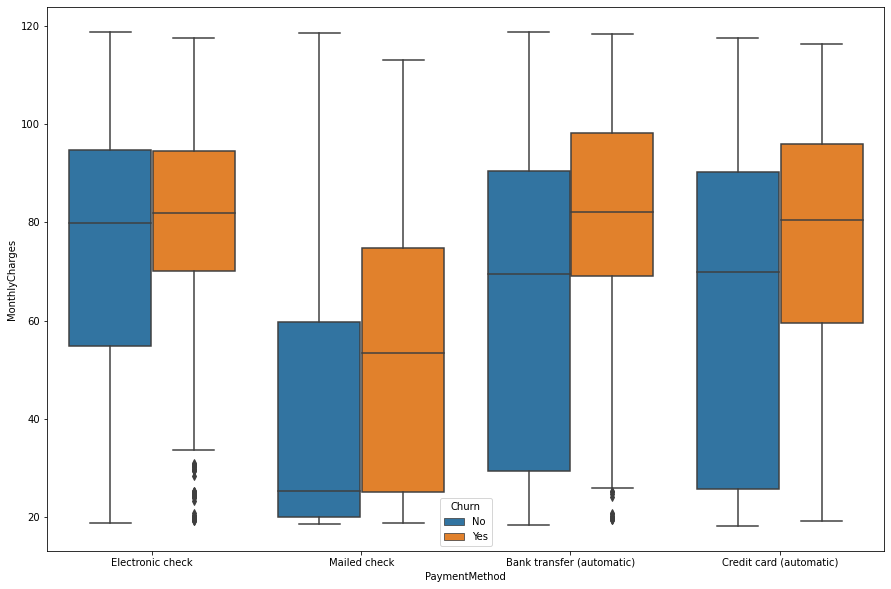

In [120]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['PaymentMethod'],y=df['MonthlyCharges'],hue=df['Churn'])

In [121]:
label_df=df.groupby(["PaymentMethod","Churn"])['MonthlyCharges'].mean().sort_values(ascending=False).index

In [122]:
val_df=df.groupby(["PaymentMethod","Churn"])['MonthlyCharges'].mean().sort_values(ascending=False).values

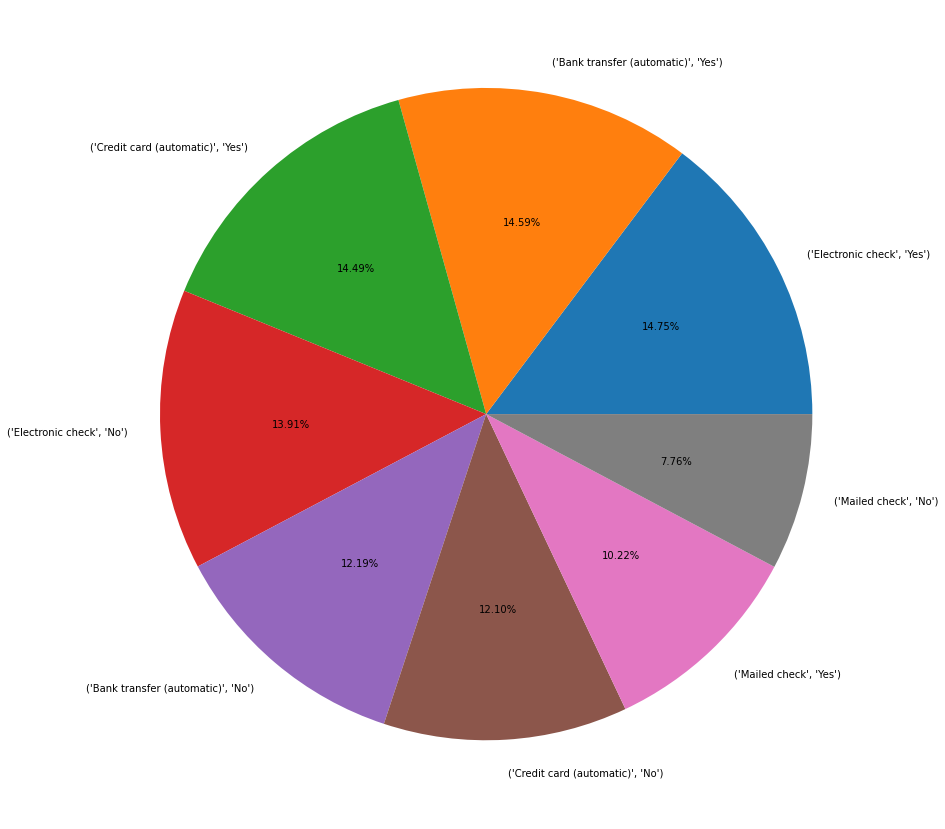

In [123]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [124]:
df.groupby(["PaymentMethod","Churn"])['MonthlyCharges'].mean()

PaymentMethod              Churn
Bank transfer (automatic)  No       65.049417
                           Yes      77.875581
Credit card (automatic)    No       64.562209
                           Yes      77.356034
Electronic check           No       74.232032
                           Yes      78.700980
Mailed check               No       41.403911
                           Yes      54.557143
Name: MonthlyCharges, dtype: float64

# Observations:
1. Avg Monthly charges for Electronic check who churn is maximum : 78.700980
2. Avg Monthly charges for Mailed check who do not churn is minimum : 41.403911



<AxesSubplot:xlabel='PaperlessBilling', ylabel='MonthlyCharges'>

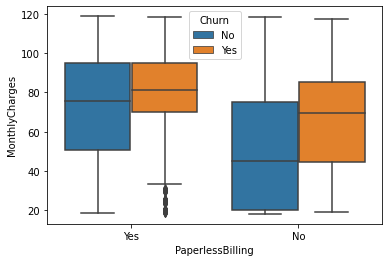

In [125]:
sns.boxplot(x=df['PaperlessBilling'],y=df['MonthlyCharges'],hue=df['Churn'])

In [126]:
df.groupby(["PaperlessBilling","Churn"])['MonthlyCharges'].mean()

PaperlessBilling  Churn
No                No       49.813962
                  Yes      63.157463
Yes               No       71.195525
                  Yes      78.221429
Name: MonthlyCharges, dtype: float64

# Observations:
1. Avg Monthly charges for PaperlessBilling who churn is maximum : 78.221429
2. Avg Monthly charges for No PaperlessBilling who do not churn is minimum : 49.813962



In [127]:
label_df=df.groupby(["PaperlessBilling","Churn"])['MonthlyCharges'].mean().sort_values(ascending=False).index

In [128]:
val_df=df.groupby(["PaperlessBilling","Churn"])['MonthlyCharges'].mean().sort_values(ascending=False).values

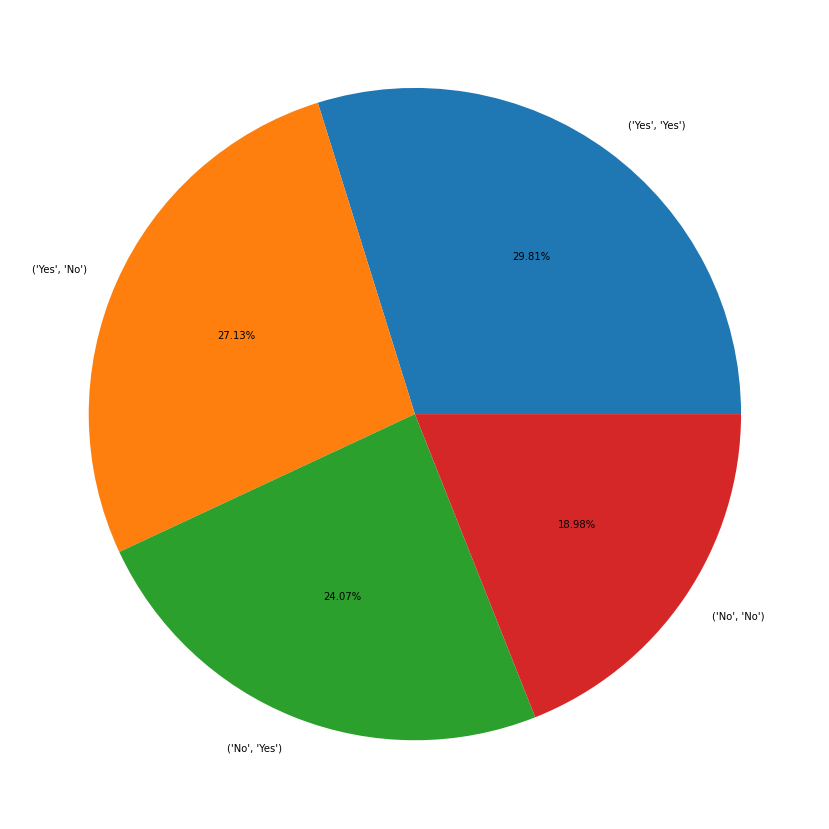

In [129]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [130]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [131]:
def Convert(val):
    val=str(val)
    
    if val=="\n":
        return float(0)
    elif val==" ":
        return float(0)
    else:
        return float(val)

In [132]:
df['TotalCharges']=df['TotalCharges'].apply(Convert)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

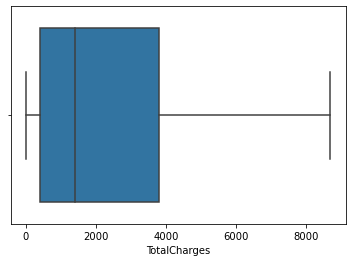

In [133]:
sns.boxplot(df['TotalCharges'])

In [134]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

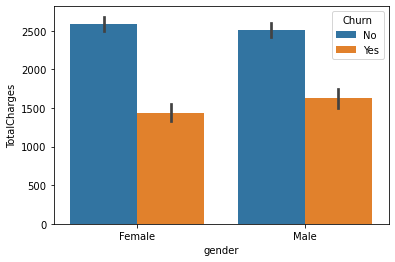

In [135]:
sns.barplot(x='gender',y='TotalCharges',data=df,hue='Churn')

In [136]:
df.groupby(["gender","Churn"])['TotalCharges'].mean()

gender  Churn
Female  No       2588.966046
        Yes      1440.979499
Male    No       2511.987562
        Yes      1623.491559
Name: TotalCharges, dtype: float64

In [137]:
label_df=df.groupby(["gender","Churn"])['TotalCharges'].mean().sort_values(ascending=False).index

In [138]:
val_df=df.groupby(["gender","Churn"])['TotalCharges'].mean().sort_values(ascending=False).values

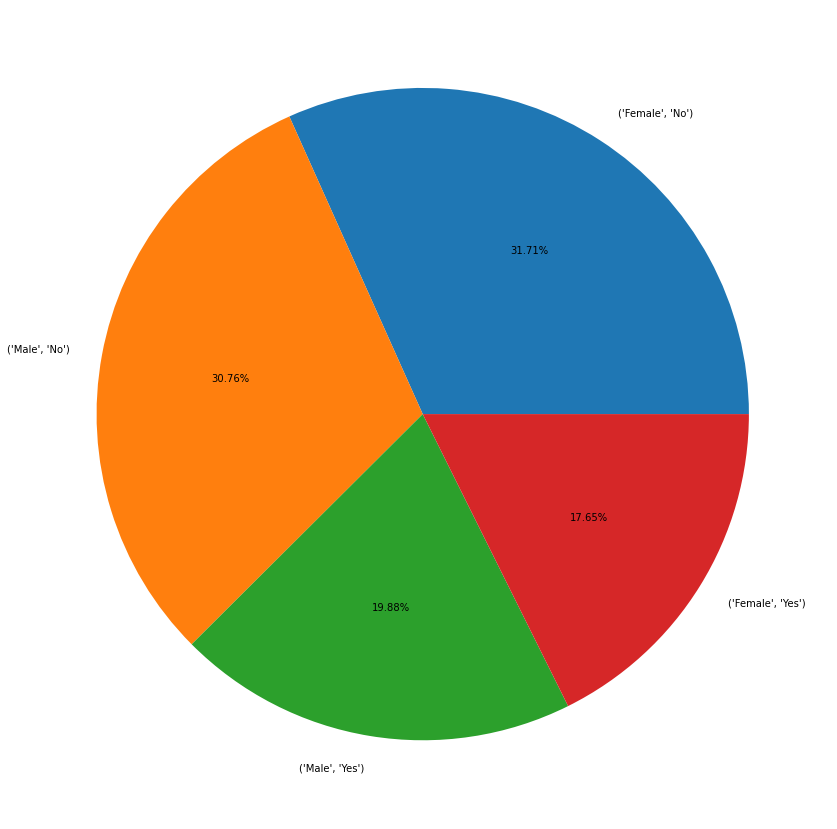

In [139]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Female Customers who don't churn has maximum avg total charges : 2588.966046
2. Female Customers who churn has minimum avg total charges : 1440.979499


<AxesSubplot:>

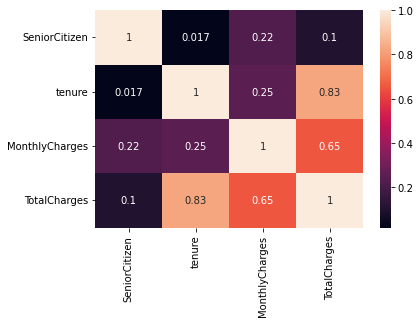

In [140]:
sns.heatmap(df.corr(),annot=True)

In [141]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

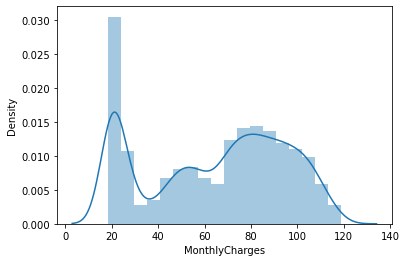

In [142]:
sns.distplot(df['MonthlyCharges'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

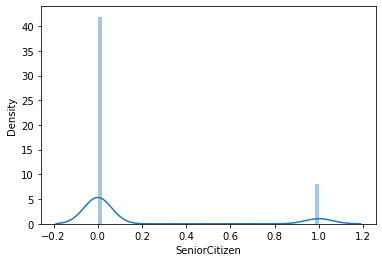

In [143]:
sns.distplot(df['SeniorCitizen'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

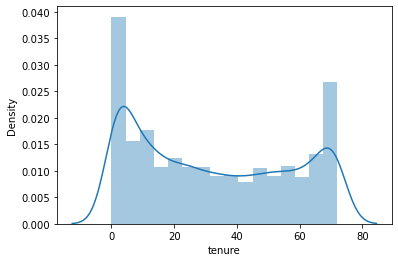

In [144]:
sns.distplot(df['tenure'])

In [145]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<AxesSubplot:xlabel='PaperlessBilling', ylabel='TotalCharges'>

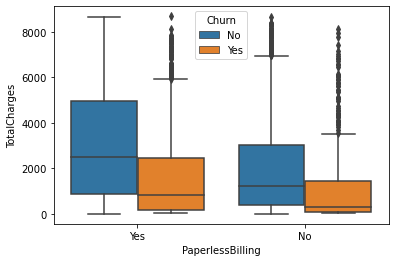

In [146]:
sns.boxplot(x=df['PaperlessBilling'],y=df['TotalCharges'],hue=df['Churn'])

In [147]:
df.groupby(["PaperlessBilling","Churn"])['TotalCharges'].mean()

PaperlessBilling  Churn
No                No       1973.377216
                  Yes      1196.915991
Yes               No       3049.879592
                  Yes      1643.980929
Name: TotalCharges, dtype: float64

In [148]:
label_df=df.groupby(["PaperlessBilling","Churn"])['TotalCharges'].mean().sort_values(ascending=False).index

In [149]:
val_df=df.groupby(["PaperlessBilling","Churn"])['TotalCharges'].mean().sort_values(ascending=False).values

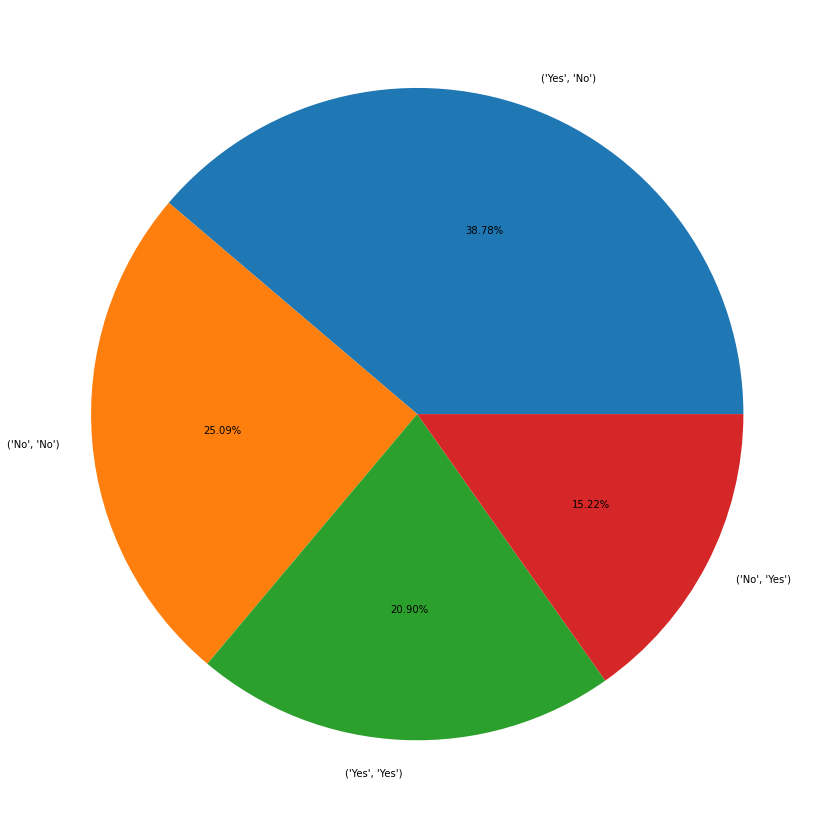

In [150]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who have PaperlessBilling service and who don't churn has maximum total bill amount :3049.879592 
2. Customers who don't have PaperlessBilling service and who do churn has minimum total bill amount :1196.915991 


<AxesSubplot:xlabel='PaymentMethod', ylabel='TotalCharges'>

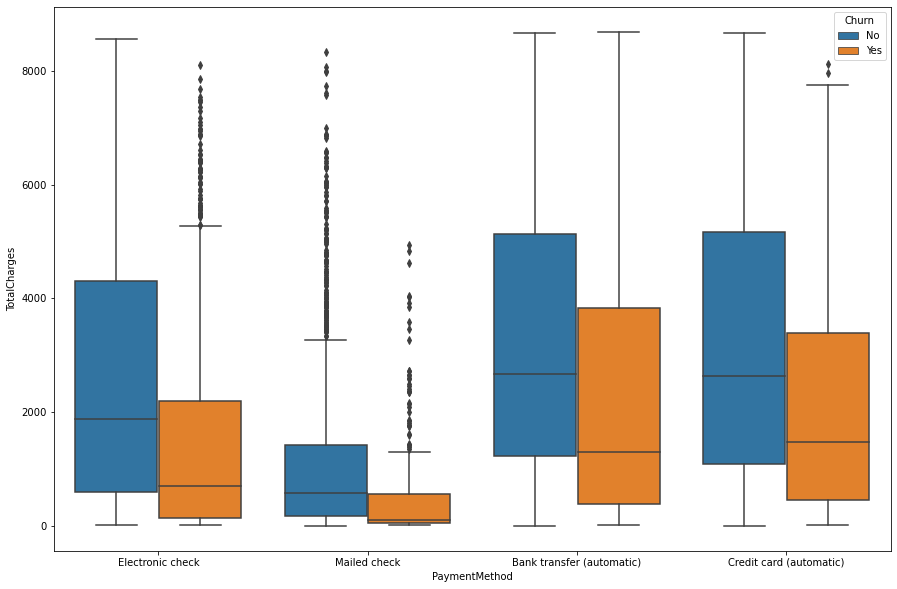

In [151]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['PaymentMethod'],y=df['TotalCharges'],hue=df['Churn'])

In [152]:
label_df=df.groupby(["PaymentMethod","Churn"])['TotalCharges'].mean().sort_values(ascending=False).index

In [153]:
val_df=df.groupby(["PaymentMethod","Churn"])['TotalCharges'].mean().sort_values(ascending=False).values

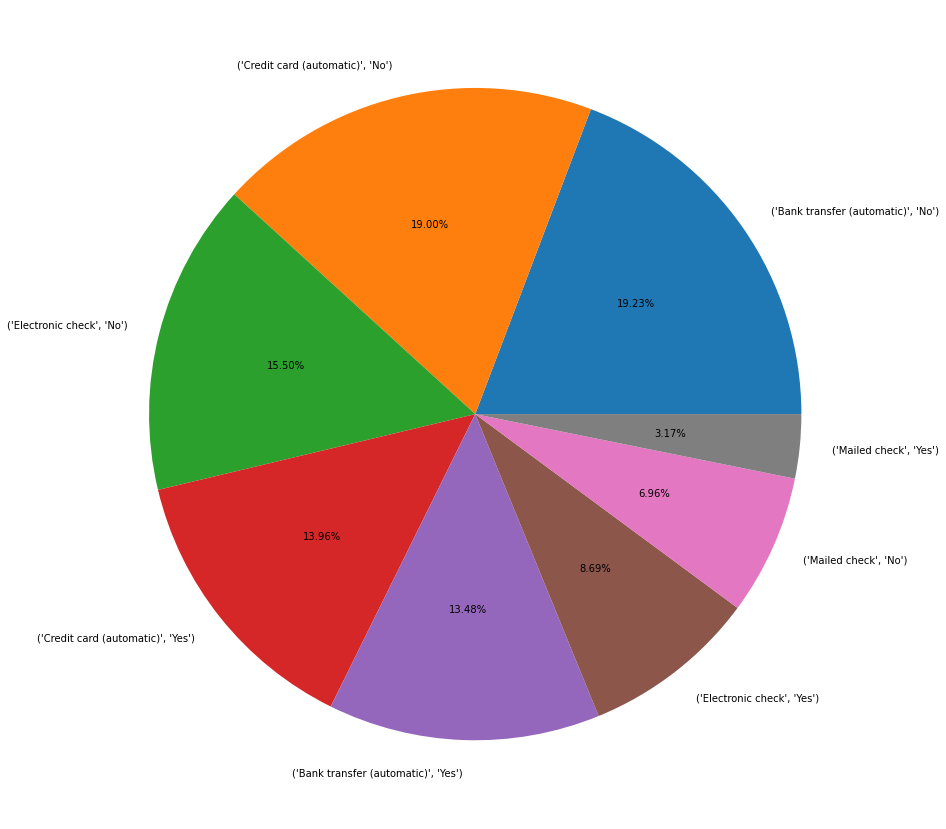

In [154]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [155]:
df.groupby(["PaymentMethod","Churn"])['TotalCharges'].mean()

PaymentMethod              Churn
Bank transfer (automatic)  No       3236.911470
                           Yes      2269.812984
Credit card (automatic)    No       3198.708178
                           Yes      2350.257759
Electronic check           No       2609.989838
                           Yes      1463.656769
Mailed check               No       1170.945744
                           Yes       534.022565
Name: TotalCharges, dtype: float64

# Observations:
1. Customers who have Mailed check payment method service and who do churn has minimum total bill amount :534.022565 
2. Customers who have Bank transfer (automatic) payment method service and who do not churn has maximum total bill amount : 3236.911470


<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

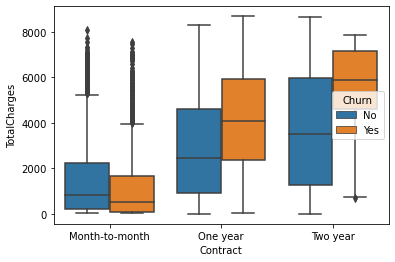

In [156]:
sns.boxplot(x=df['Contract'],y=df['TotalCharges'],hue=df['Churn'])

In [157]:
df.groupby(["Contract","Churn"])['TotalCharges'].mean()

Contract        Churn
Month-to-month  No       1521.927590
                Yes      1164.460574
One year        No       2901.348355
                Yes      4066.212048
Two year        No       3656.648604
                Yes      5432.363542
Name: TotalCharges, dtype: float64

In [158]:
label_df=df.groupby(["Contract","Churn"])['TotalCharges'].mean().sort_values(ascending=False).index

In [159]:
val_df=df.groupby(["Contract","Churn"])['TotalCharges'].mean().sort_values(ascending=False).values

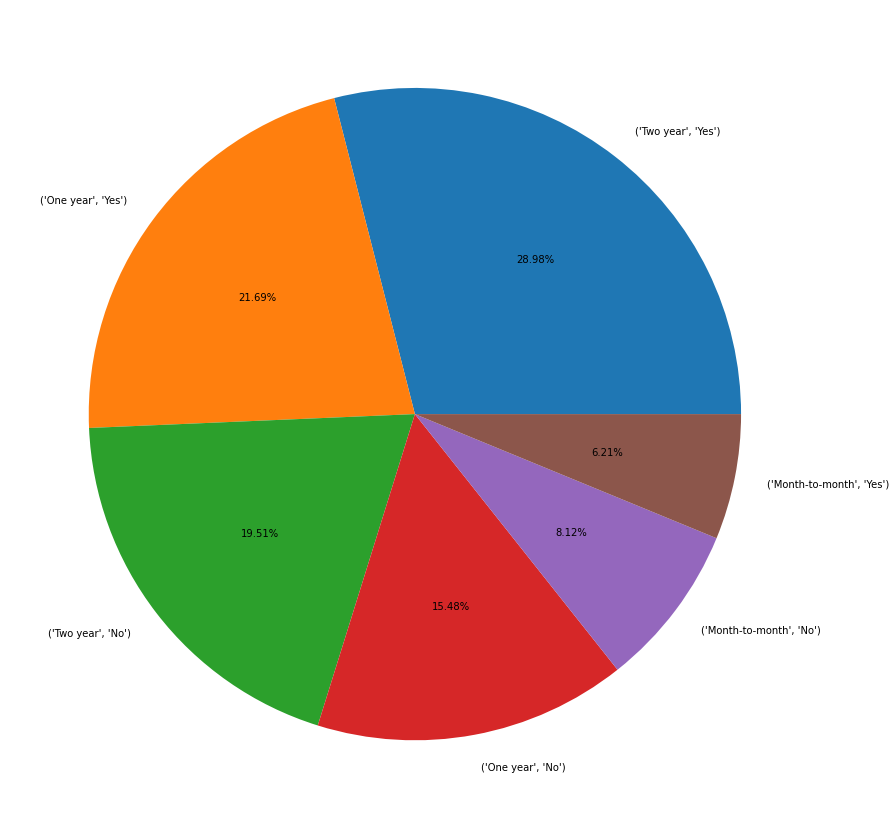

In [160]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who have Contract of one year and who do churn has maximum total bill amount :4066.212048 
2. Customers who have Contract of month to month and who do churn has minimum total bill amount :1164.460764

<AxesSubplot:xlabel='InternetService', ylabel='TotalCharges'>

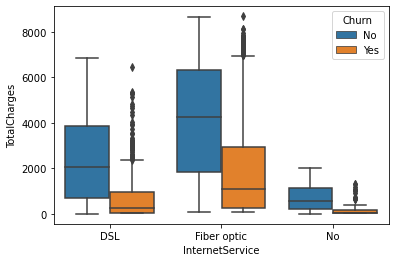

In [161]:
sns.boxplot(x=df['InternetService'],y=df['TotalCharges'],hue=df['Churn'])

In [162]:
df.groupby(["InternetService","Churn"])['TotalCharges'].mean()

InternetService  Churn
DSL              No       2426.806498
                 Yes       784.349673
Fiber optic      No       4135.834074
                 Yes      1914.616384
No               No        701.685740
                 Yes       173.919912
Name: TotalCharges, dtype: float64

In [163]:
label_df=df.groupby(["InternetService","Churn"])['TotalCharges'].mean().sort_values(ascending=False).index

In [164]:
val_df=df.groupby(["InternetService","Churn"])['TotalCharges'].mean().sort_values(ascending=False).values

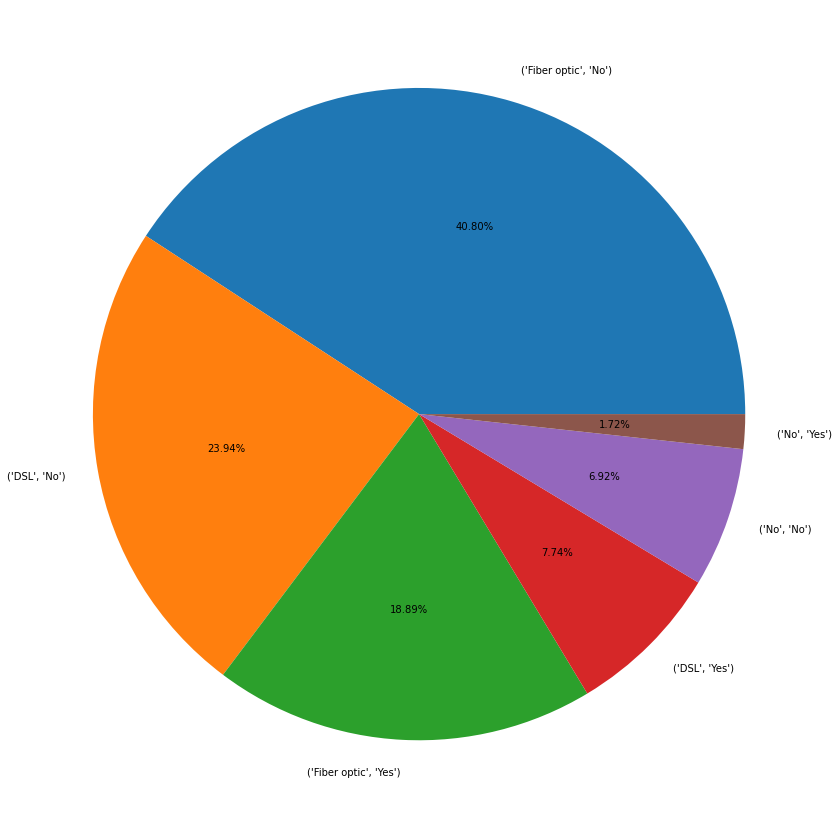

In [165]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who have InternetService Fiber Optic and who do not churn has maximum total bill amount :4135.834074 
2. Customers who have no InternetService and who do churn has minimum total bill amount :173.919912

<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

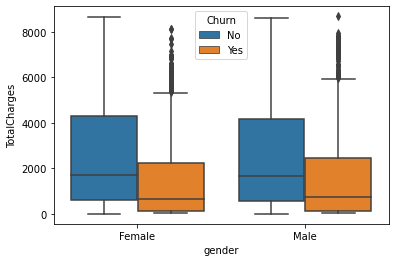

In [166]:
sns.boxplot(x=df['gender'],y=df['TotalCharges'],hue=df['Churn'])

In [167]:
df.groupby(["gender","Churn"])['TotalCharges'].mean()

gender  Churn
Female  No       2588.966046
        Yes      1440.979499
Male    No       2511.987562
        Yes      1623.491559
Name: TotalCharges, dtype: float64

In [168]:
label_df=df.groupby(["gender","Churn"])['TotalCharges'].mean().sort_values(ascending=False).index

In [169]:
val_df=df.groupby(["gender","Churn"])['TotalCharges'].mean().sort_values(ascending=False).values

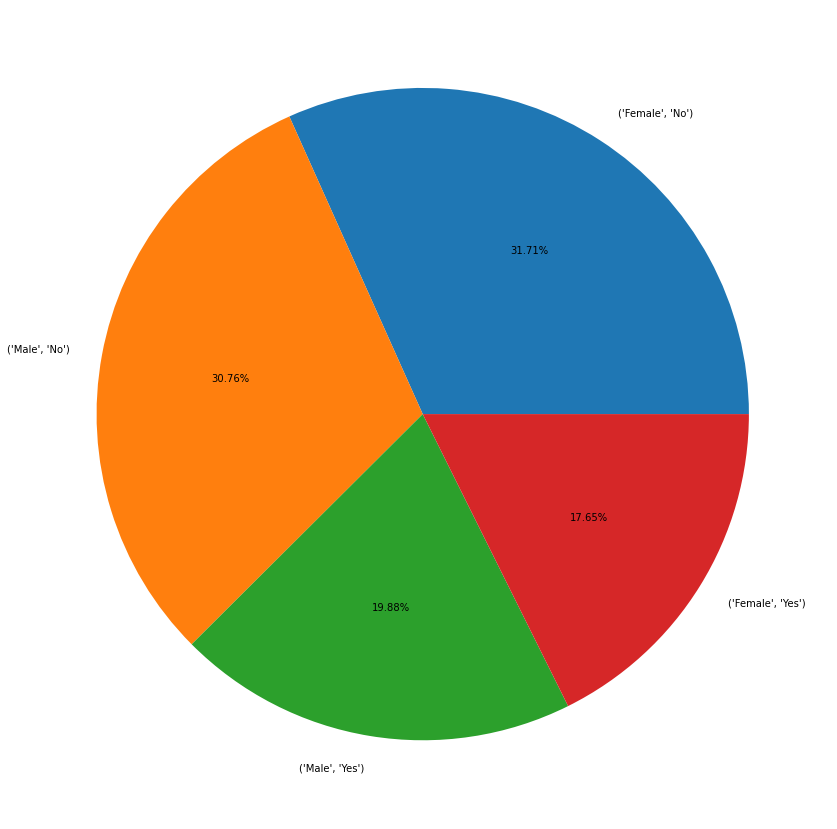

In [170]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Female Customers who do not churn has maximum total charges : 2588.966046
2. Female Customers who churn has minimum total charges : 1440.979499


In [171]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [172]:
df['MonthlyCharges_Range']=pd.qcut(df['MonthlyCharges'],5)

In [173]:
df['TotalCharges_Range']=pd.qcut(df['TotalCharges'],5)

In [174]:
df['Tenure_Range']=pd.qcut(df['tenure'],5)

In [175]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Range,TotalCharges_Range,Tenure_Range
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,"(25.05, 58.83]","(-0.001, 265.32]","(-0.001, 6.0]"
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,"(25.05, 58.83]","(939.78, 2043.71]","(20.0, 40.0]"
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,"(25.05, 58.83]","(-0.001, 265.32]","(-0.001, 6.0]"
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,"(25.05, 58.83]","(939.78, 2043.71]","(40.0, 60.0]"
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,"(58.83, 79.1]","(-0.001, 265.32]","(-0.001, 6.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,"(79.1, 94.25]","(939.78, 2043.71]","(20.0, 40.0]"
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,"(94.25, 118.75]","(4471.44, 8684.8]","(60.0, 72.0]"
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,"(25.05, 58.83]","(265.32, 939.78]","(6.0, 20.0]"
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,"(58.83, 79.1]","(265.32, 939.78]","(-0.001, 6.0]"


<AxesSubplot:xlabel='MonthlyCharges_Range', ylabel='count'>

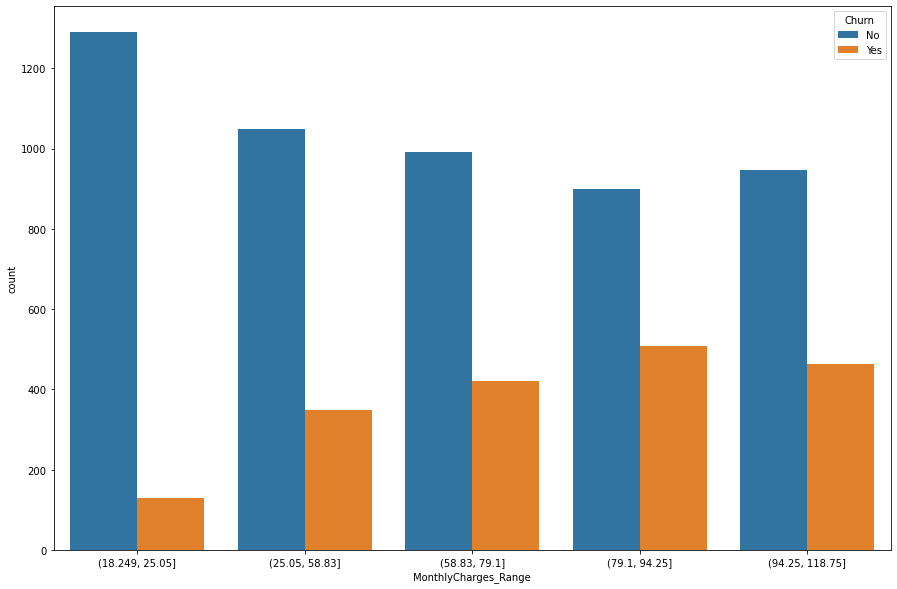

In [176]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['MonthlyCharges_Range'],hue=df['Churn'])

In [177]:
label_df=df.groupby(["MonthlyCharges_Range","Churn"]).size().sort_values(ascending=False).index

In [178]:
val_df=df.groupby(["MonthlyCharges_Range","Churn"]).size().sort_values(ascending=False).values

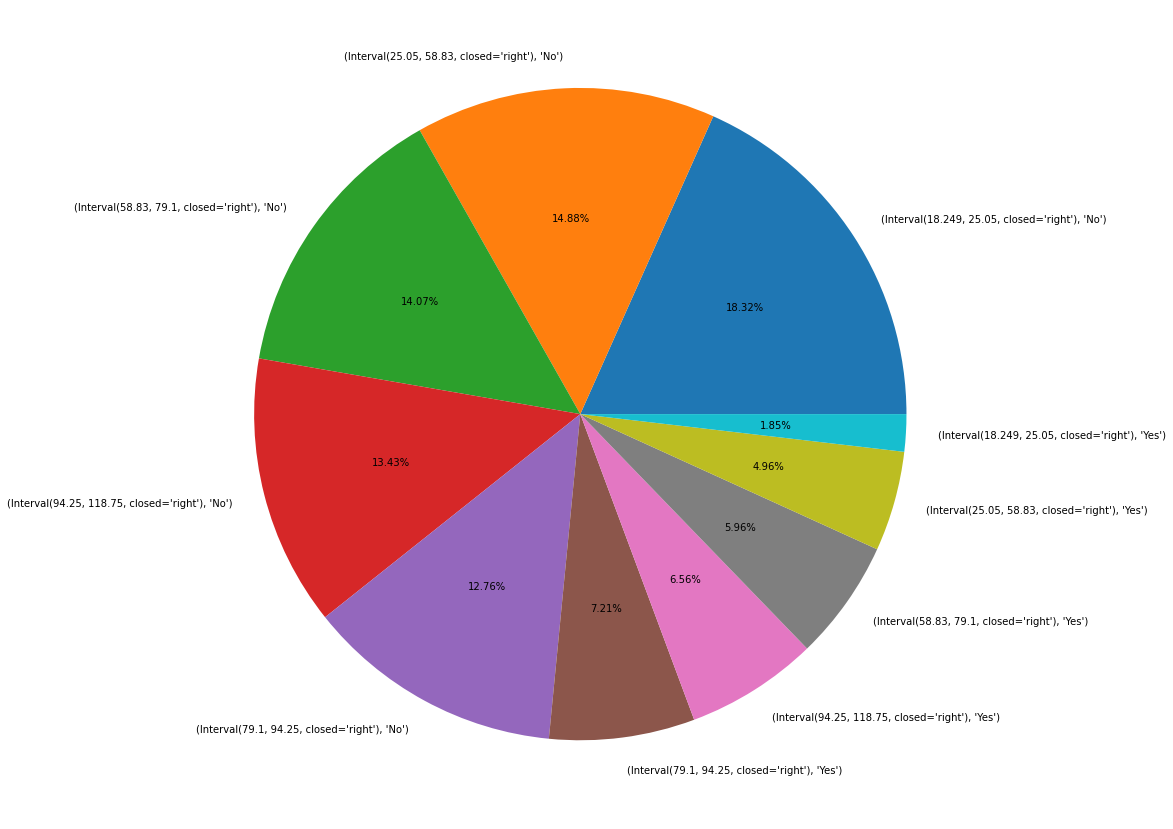

In [179]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers with Monthly Charges between 79.1 and 94.25 do maximum churn.
2. Customers with Monthly Charges between 18.249 and 25.05 do minimum churn.



<AxesSubplot:xlabel='TotalCharges_Range', ylabel='count'>

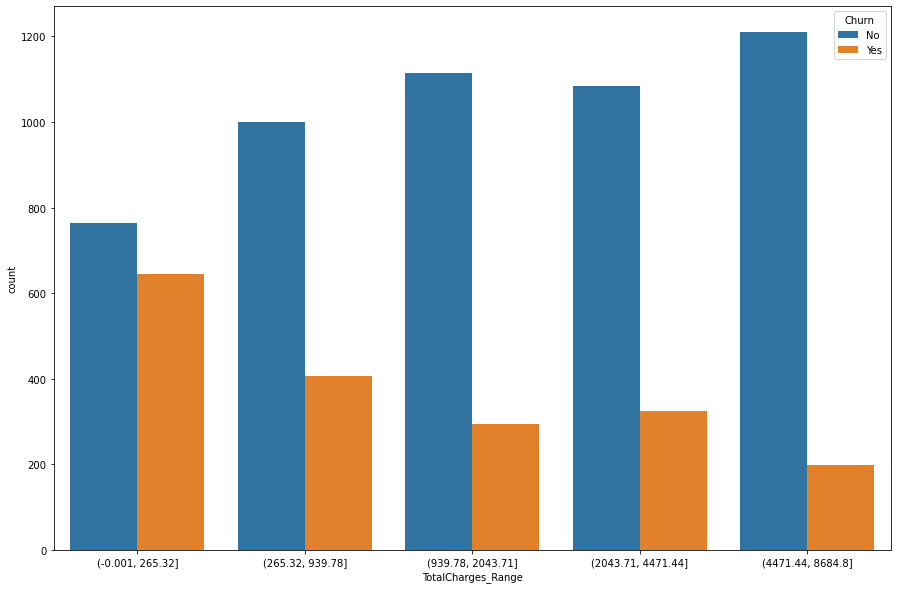

In [180]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['TotalCharges_Range'],hue=df['Churn'])

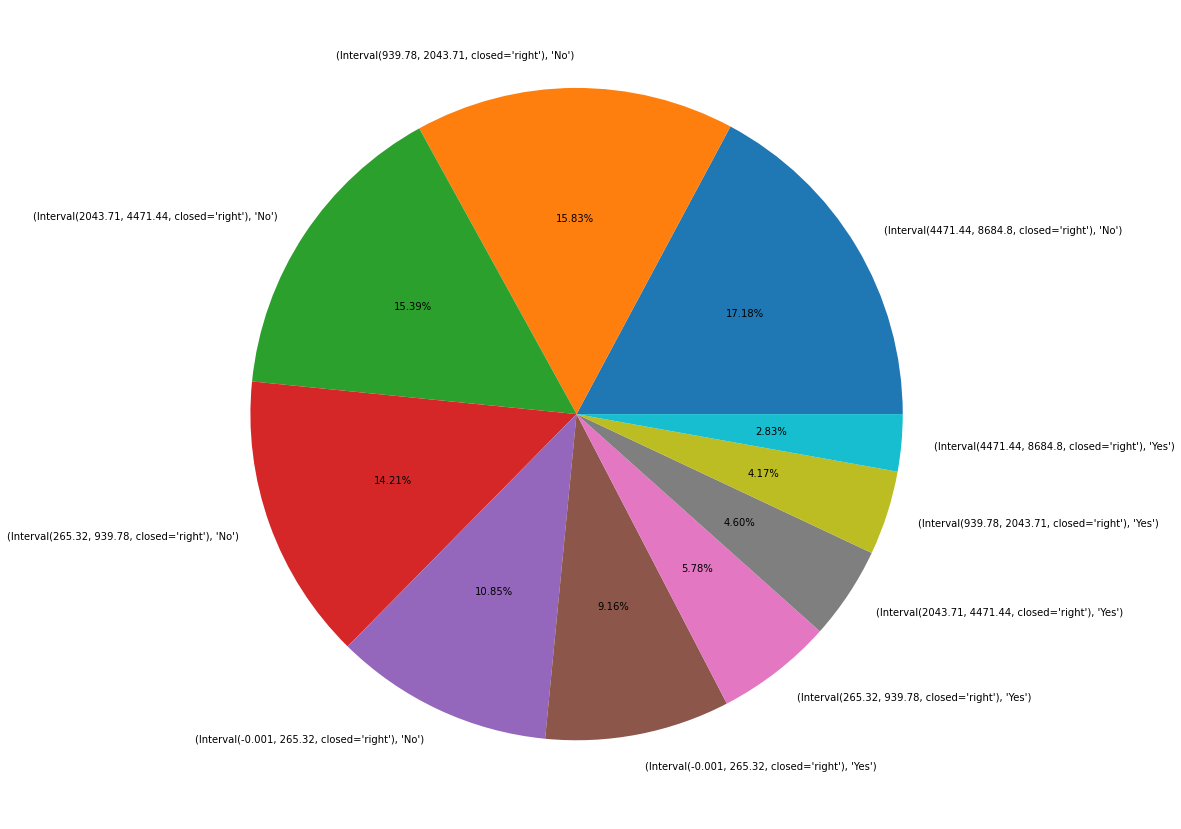

In [181]:
label_df=df.groupby(["TotalCharges_Range","Churn"]).size().sort_values(ascending=False).index

val_df=df.groupby(["TotalCharges_Range","Churn"]).size().sort_values(ascending=False).values

plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers with Total Charges between 0 and 265.32 churn maximum.
2. Customers with Total Charges between 4471.44 and 8684.8  churn minimum.



<AxesSubplot:xlabel='Tenure_Range', ylabel='count'>

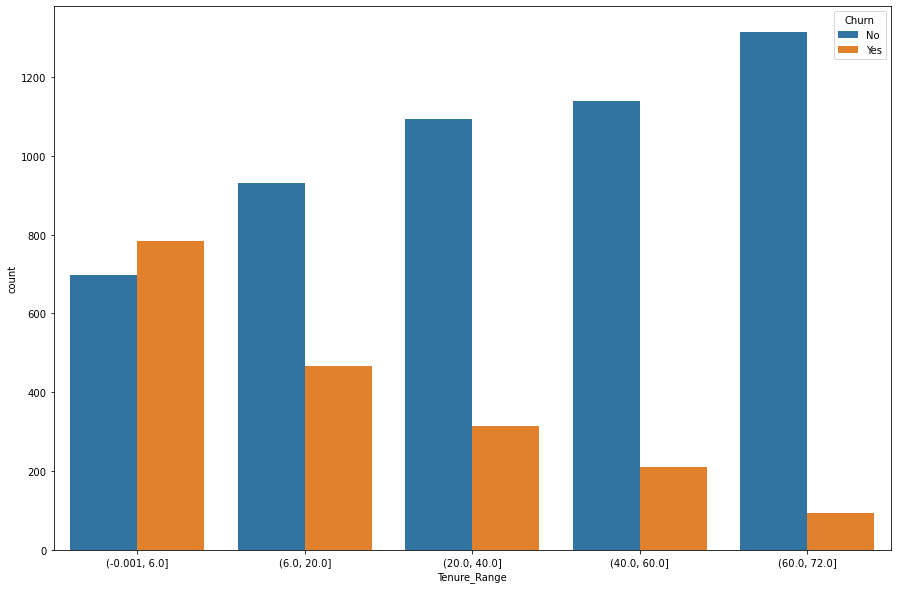

In [182]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Tenure_Range'],hue=df['Churn'])

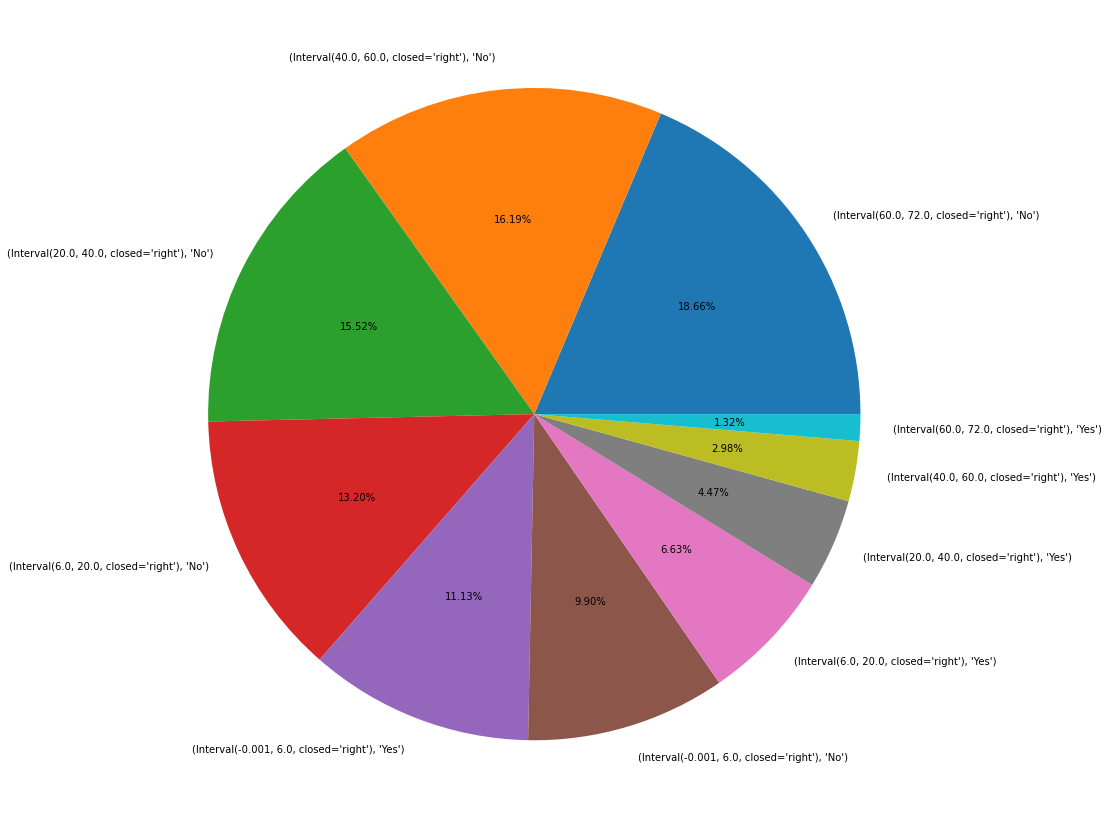

In [183]:
label_df=df.groupby(["Tenure_Range","Churn"]).size().sort_values(ascending=False).index

val_df=df.groupby(["Tenure_Range","Churn"]).size().sort_values(ascending=False).values

plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers between 0 to 6 months of tenure do maximum churn .
2. Customers between 60 to 72 months of tenure do minimum churn



In [184]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Range,TotalCharges_Range,Tenure_Range
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,"(25.05, 58.83]","(-0.001, 265.32]","(-0.001, 6.0]"
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,"(25.05, 58.83]","(939.78, 2043.71]","(20.0, 40.0]"
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,"(25.05, 58.83]","(-0.001, 265.32]","(-0.001, 6.0]"
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,"(25.05, 58.83]","(939.78, 2043.71]","(40.0, 60.0]"
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,"(58.83, 79.1]","(-0.001, 265.32]","(-0.001, 6.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,"(79.1, 94.25]","(939.78, 2043.71]","(20.0, 40.0]"
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,"(94.25, 118.75]","(4471.44, 8684.8]","(60.0, 72.0]"
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,"(25.05, 58.83]","(265.32, 939.78]","(6.0, 20.0]"
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,"(58.83, 79.1]","(265.32, 939.78]","(-0.001, 6.0]"


<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

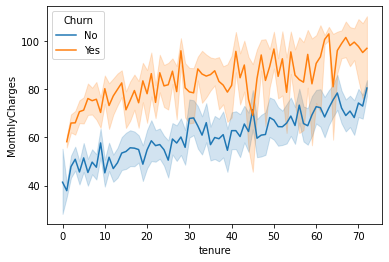

In [185]:
sns.lineplot(x=df['tenure'],y=df['MonthlyCharges'],hue=df['Churn'])

# Observations:
1. As the tenure increases Monthly charges also increases.
2. As the tenure increases Monthly charges of churn customer increases rapidly as compare to non-churn customers.
3. Monthly Charges for Churn customers are more as compared to non-churn customers.


<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

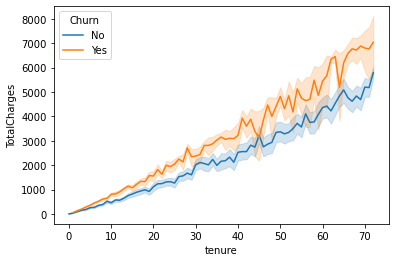

In [186]:
sns.lineplot(x=df['tenure'],y=df['TotalCharges'],hue=df['Churn'])

# Observations:
1. As the tenure increases Total charges also increases.
2. As the tenure increases Total charges of churn customer increases rapidly as compare to non-churn customers.
3. Total Charges for Churn customers are more as compared to non-churn customers.

In [187]:
le=LabelEncoder()

In [188]:
df['gender']=le.fit_transform(df['gender'])


In [189]:
df['Partner']=le.fit_transform(df['Partner'])


In [190]:
df['Dependents']=le.fit_transform(df['Dependents'])


In [191]:
df['PhoneService']=le.fit_transform(df['PhoneService'])

In [192]:
df['MultipleLines']=le.fit_transform(df['MultipleLines'])

In [193]:
df['InternetService']=le.fit_transform(df['InternetService'])

In [194]:
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])

In [195]:
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])

In [196]:
df['TechSupport']=le.fit_transform(df['TechSupport'])

In [197]:
df['StreamingTV']=le.fit_transform(df['StreamingTV'])

In [198]:
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])

In [199]:
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])

In [200]:
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])

In [201]:
df['Contract']=le.fit_transform(df['Contract'])

In [202]:
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])

In [203]:
df['Churn']=le.fit_transform(df['Churn'])

In [204]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Range,TotalCharges_Range,Tenure_Range
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,1,2,29.85,29.85,0,"(25.05, 58.83]","(-0.001, 265.32]","(-0.001, 6.0]"
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,0,1,0,3,56.95,1889.50,0,"(25.05, 58.83]","(939.78, 2043.71]","(20.0, 40.0]"
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,1,3,53.85,108.15,1,"(25.05, 58.83]","(-0.001, 265.32]","(-0.001, 6.0]"
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,0,1,0,0,42.30,1840.75,0,"(25.05, 58.83]","(939.78, 2043.71]","(40.0, 60.0]"
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,1,2,70.70,151.65,1,"(58.83, 79.1]","(-0.001, 265.32]","(-0.001, 6.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,1,1,3,84.80,1990.50,0,"(79.1, 94.25]","(939.78, 2043.71]","(20.0, 40.0]"
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,1,1,1,103.20,7362.90,0,"(94.25, 118.75]","(4471.44, 8684.8]","(60.0, 72.0]"
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,1,2,29.60,346.45,0,"(25.05, 58.83]","(265.32, 939.78]","(6.0, 20.0]"
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,1,3,74.40,306.60,1,"(58.83, 79.1]","(265.32, 939.78]","(-0.001, 6.0]"


In [205]:
df.drop(['customerID','MonthlyCharges_Range','TotalCharges_Range','Tenure_Range','TotalCharges'],axis=1,inplace=True)

In [206]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,1


In [207]:
y=df['Churn']

In [208]:
X=df.drop('Churn',axis=1)

In [209]:
sc=StandardScaler()

In [210]:
X=sc.fit_transform(X)

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [212]:
X_train.shape

(5634, 18)

# LogisticRegression

In [213]:
lr=LogisticRegression()

In [214]:
lr.fit(X_train,y_train)

LogisticRegression()

In [215]:
y_pred=lr.predict(X_train)


# Accuracy score of training data 

In [216]:
accuracy_score(y_train,y_pred)

0.8015619453319134

In [217]:
mean_squared_error(y_train,y_pred)

0.19843805466808662

In [218]:
y_pred=lr.predict(X_test)

# Accuracy score of testing data

In [219]:
accuracy_score(y_test,y_pred)

0.8197303051809794

In [220]:
mean_squared_error(y_test,y_pred)

0.18026969481902058

In [221]:
confusion_matrix(y_test,y_pred)

array([[936, 100],
       [154, 219]], dtype=int64)

In [222]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



In [223]:
kf=KFold(5)

In [224]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [225]:
scores=cross_val_score(lr,X,y,cv=kf)

In [226]:
for fold_idx,score in enumerate(scores,start=1):
    print(fold_idx,score)

1 0.8062455642299503
2 0.8183108587650816
3 0.7913413768630234
4 0.7997159090909091
5 0.8046875


In [227]:
average_score=scores.mean()

In [228]:
average_score

0.804060241789793

# RandomForestClassifier

In [229]:
rfc=RandomForestClassifier()


In [230]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [231]:
y_pred=rfc.predict(X_train)


# Accuracy score of training data 

In [232]:
accuracy_score(y_train,y_pred)

0.9982250621228257

In [233]:
mean_squared_error(y_train,y_pred)

0.001774937877174299

In [234]:
y_pred=lr.predict(X_test)

# Accuracy score of testing data

In [235]:
accuracy_score(y_test,y_pred)

0.8197303051809794

In [236]:
mean_squared_error(y_test,y_pred)

0.18026969481902058

In [237]:
rfc.predict_proba(X_test)

array([[0.32, 0.68],
       [0.93, 0.07],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [0.94, 0.06],
       [0.54, 0.46]])

In [238]:
confusion_matrix(y_test,y_pred)

array([[936, 100],
       [154, 219]], dtype=int64)

In [239]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



In [240]:
kf=KFold(5)

In [241]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [242]:
scores=cross_val_score(rfc,X,y,cv=kf)

In [243]:
for fold_idx,score in enumerate(scores,start=1):
    print(fold_idx,score)

1 0.7984386089425124
2 0.7856635911994322
3 0.7764371894960965
4 0.7826704545454546
5 0.7940340909090909


In [244]:
average_score=scores.mean()

In [245]:
average_score

0.7874487870185173

# Decision Tree Classifier

In [246]:
dtc=DecisionTreeClassifier()


In [247]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [248]:
y_pred=dtc.predict(X_train)


# Accuracy score of training data 

In [249]:
accuracy_score(y_train,y_pred)

0.9982250621228257

In [250]:
mean_squared_error(y_train,y_pred)

0.001774937877174299

In [251]:
y_pred=dtc.predict(X_test)

# Accuracy score of testing data

In [252]:
accuracy_score(y_test,y_pred)

0.709013484740951

In [253]:
mean_squared_error(y_test,y_pred)

0.29098651525904895

In [254]:
dtc.predict_proba(X_test)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [255]:
confusion_matrix(y_test,y_pred)

array([[820, 216],
       [194, 179]], dtype=int64)

In [256]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1036
           1       0.45      0.48      0.47       373

    accuracy                           0.71      1409
   macro avg       0.63      0.64      0.63      1409
weighted avg       0.71      0.71      0.71      1409



In [257]:
kf=KFold(5)

In [258]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [259]:
scores=cross_val_score(dtc,X,y,cv=kf)

In [260]:
for fold_idx,score in enumerate(scores,start=1):
    print(fold_idx,score)

1 0.7374024130589071
2 0.7366926898509581
3 0.7253371185237757
4 0.703125
5 0.7208806818181818


In [261]:
average_score=scores.mean()

In [262]:
average_score

0.7246875806503645

# KNeighborsClassifier

In [263]:
knc=KNeighborsClassifier()


In [264]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [265]:
y_pred=knc.predict(X_train)


# Accuracy score of training data 

In [266]:
accuracy_score(y_train,y_pred)

0.8306709265175719

In [267]:
mean_squared_error(y_train,y_pred)

0.16932907348242812

In [268]:
y_pred=knc.predict(X_test)

# Accuracy score of testing data

In [269]:
accuracy_score(y_test,y_pred)

0.7579843860894251

In [270]:
mean_squared_error(y_test,y_pred)

0.24201561391057488

In [271]:
knc.predict_proba(X_test)

array([[0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6]])

In [272]:
confusion_matrix(y_test,y_pred)

array([[875, 161],
       [180, 193]], dtype=int64)

In [273]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1036
           1       0.55      0.52      0.53       373

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.76      1409



In [274]:
kf=KFold(5)

In [275]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [276]:
scores=cross_val_score(knc,X,y,cv=kf)

In [277]:
for fold_idx,score in enumerate(scores,start=1):
    print(fold_idx,score)

1 0.7636621717530163
2 0.7665010645848119
3 0.7409510290986515
4 0.7464488636363636
5 0.7549715909090909


In [278]:
average_score=scores.mean()

In [279]:
average_score

0.7545069439963868

# GradientBoostingClassifier

In [280]:
gbc=GradientBoostingClassifier()


In [281]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [282]:
y_pred=gbc.predict(X_train)

# Accuracy score of training data 

In [283]:
accuracy_score(y_train,y_pred)

0.8225062122825701

In [284]:
mean_squared_error(y_train,y_pred)

0.17749378771742988

In [285]:
y_pred=knc.predict(X_test)

# Accuracy score of testing data

In [286]:
accuracy_score(y_test,y_pred)

0.7579843860894251

In [287]:
mean_squared_error(y_test,y_pred)

0.24201561391057488

In [288]:
confusion_matrix(y_test,y_pred)

array([[875, 161],
       [180, 193]], dtype=int64)

In [289]:
gbc.predict_proba(X_test)

array([[0.27037941, 0.72962059],
       [0.90954916, 0.09045084],
       [0.98151278, 0.01848722],
       ...,
       [0.95911459, 0.04088541],
       [0.96788988, 0.03211012],
       [0.33233002, 0.66766998]])

In [290]:
mean_squared_error(y_test,y_pred)

0.24201561391057488

In [291]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1036
           1       0.55      0.52      0.53       373

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.76      1409



In [292]:
kf=KFold(5)

In [293]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [294]:
scores=cross_val_score(gbc,X,y,cv=kf)

In [295]:
for fold_idx,score in enumerate(scores,start=1):
    print(fold_idx,score)

1 0.8147622427253371
2 0.8055358410220014
3 0.7927608232789212
4 0.7982954545454546
5 0.7954545454545454


In [296]:
average_score=scores.mean()

In [297]:
average_score

0.8013617814052519

# XGBoost Classifier

In [298]:
xgb_i=xgb.XGBClassifier()


In [299]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [300]:
y_pred=xgb_i.predict(X_train)


# Accuracy score of training data 

In [301]:
accuracy_score(y_train,y_pred)

0.9357472488462903

In [302]:
mean_squared_error(y_train,y_pred)

0.06425275115370963

In [303]:
y_pred=xgb_i.predict(X_test)

# Accuracy score of testing data

In [304]:
accuracy_score(y_test,y_pred)

0.7934705464868701

In [305]:
mean_squared_error(y_test,y_pred)

0.20652945351312987

In [306]:
confusion_matrix(y_test,y_pred)

array([[922, 114],
       [177, 196]], dtype=int64)

In [307]:
mean_squared_error(y_test,y_pred)

0.20652945351312987

In [308]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.53      0.57       373

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [309]:
kf=KFold(5)

In [310]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [311]:
scores=cross_val_score(lr,X,y,cv=kf)

In [312]:
for fold_idx,score in enumerate(scores,start=1):
    print(fold_idx,score)

1 0.8062455642299503
2 0.8183108587650816
3 0.7913413768630234
4 0.7997159090909091
5 0.8046875


In [313]:
average_score=scores.mean()

In [314]:
average_score

0.804060241789793

In [315]:
model=svm.SVC()

In [316]:
model.fit(X_train,y_train)

SVC()

In [317]:
y_pred=model.predict(X_train)


# Accuracy score of training data 

In [318]:
accuracy_score(y_train,y_pred)

0.8198438054668087

In [319]:
mean_squared_error(y_train,y_pred)

0.18015619453319134

In [320]:
y_pred=model.predict(X_test)

# Accuracy score of testing data

In [321]:
accuracy_score(y_test,y_pred)

0.8069552874378992

In [322]:
mean_squared_error(y_test,y_pred)

0.1930447125621008

In [323]:
confusion_matrix(y_test,y_pred)

array([[949,  87],
       [185, 188]], dtype=int64)

# We will choose Logistic Regression Model because of no overfitting probelm
# Accuracy score of Logistic Regression Model for training and testing is almost similar.